# Exercises: Monte Carlo Simulations

## Install code, setup path

To run this code you will need to clone the hyperpolarized MRI toolbox
repository from github and add it to your matlab path. 
This can be done with the following command:
'git clone https://github.com/LarsonLab/hyperpolarized-mri-toolbox/'

This also requires the Optimization Toolbox (Matlab) or 'optim' toolbox (Octave) for the kinetic model fitting and Image Processing Toolbox ('image' in Octave) for plots


In [1]:
imatlab_export_fig('print-jpeg')  % setup for inline figures

In [2]:
% setup hyperpolarized-mri-toolbox
cd ../
if exist('startup.m')
    startup
else
    cd ../
    startup
end

## Exercise: Exploring the Monte Carlo Simulation Function

These exercises will walk you through working with monte carlo simulation for HP experiments.
The function we will be using is simulations/HP_montecarlo_evaluation.m and the script demonstrating how to use the function is simulations/test_HP_montecarlo_evaluation.m

To start use the following parameters:
<ul>
    <li>NMC (# of MC samples) = 20 -- you can use higher values if you like but it will take longer to run </li>
    <li>Pyruvate T1 = 25s </li>
    <li>Lactate T1 = 25s </li>
    <li>kPL = 0.02 </li>
    <li>std noise = 0.005 </li>
    <li>Tarrival = 0 </li>
    <li>Tbolus = 8 </li>
    <li>TR = 3s </li>
    <li>Flip Angles = 10 deg (pyr), 40 deg (lac) -- see flip_scheme 1 in test_HP_montecarlo_evaluation.m </li>
    <li>Number of timepoints (N) = 16 </li>
</ul>

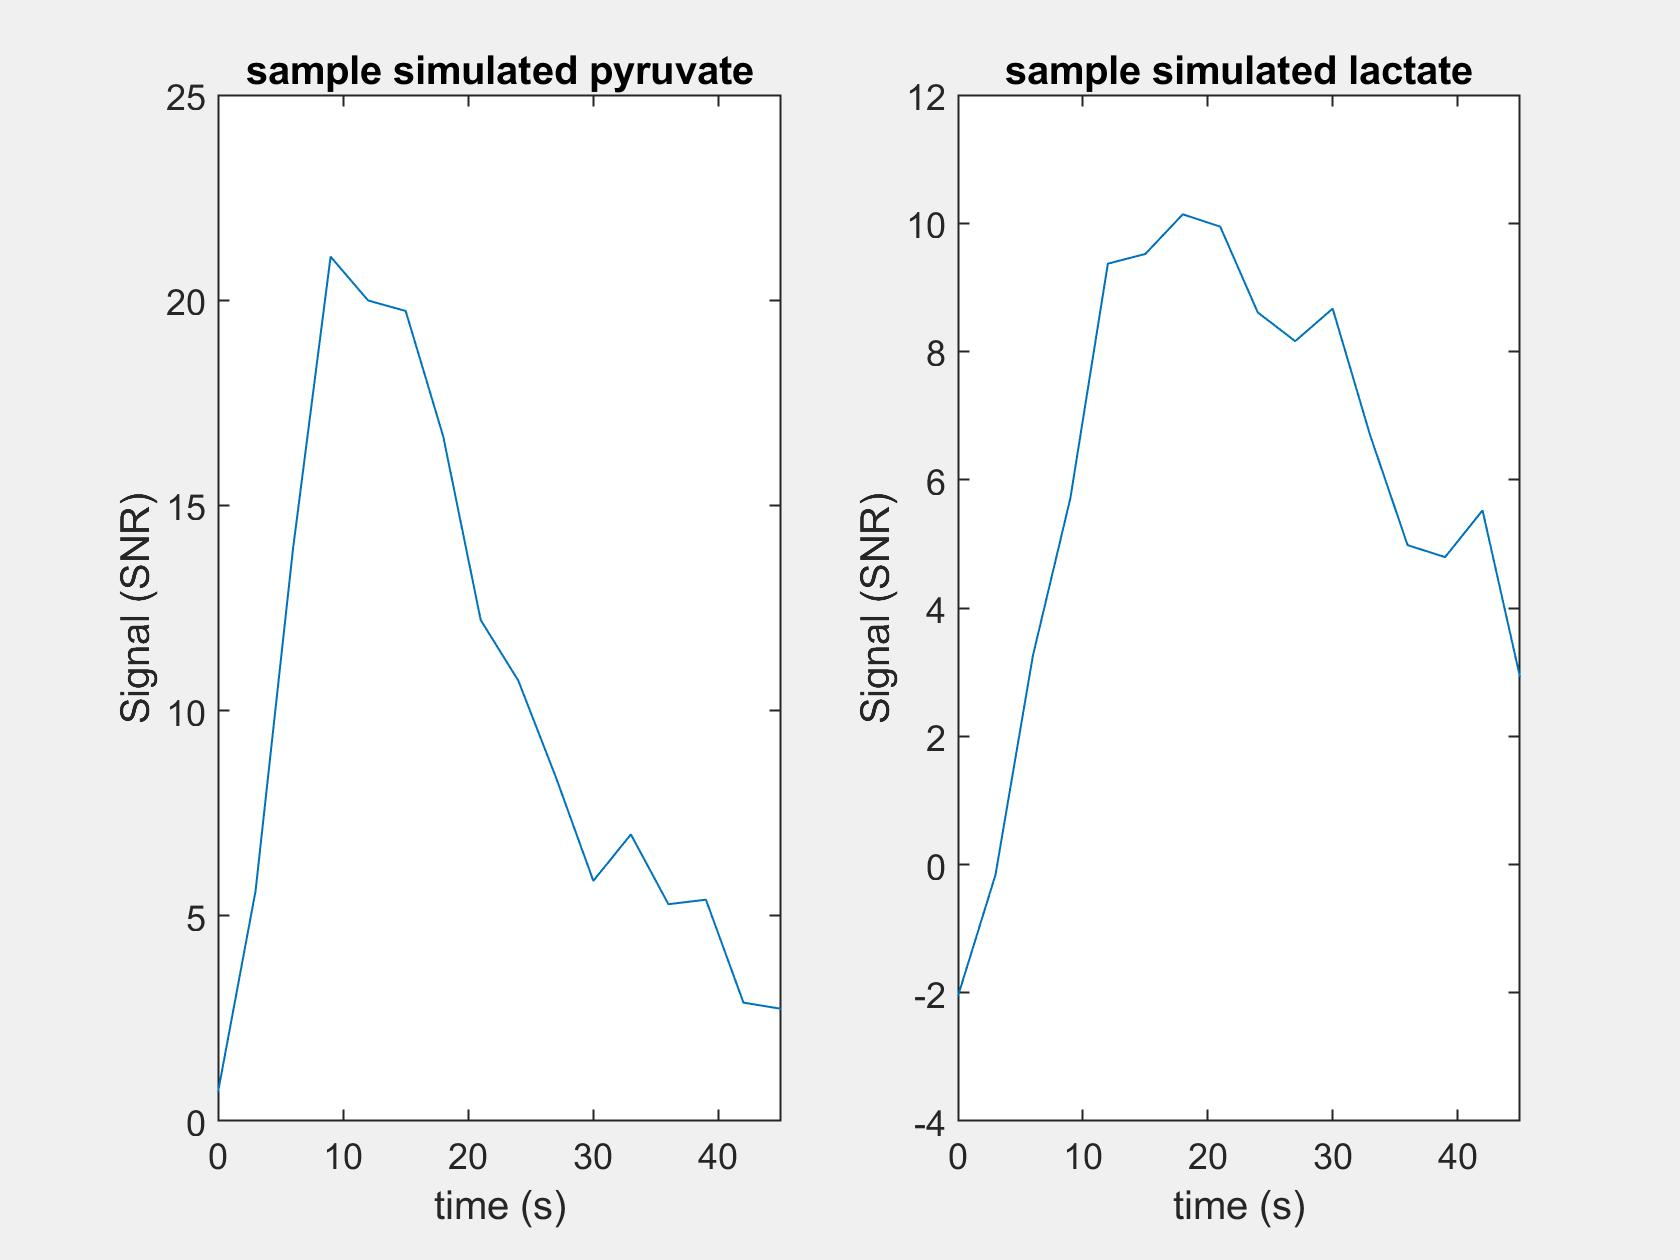

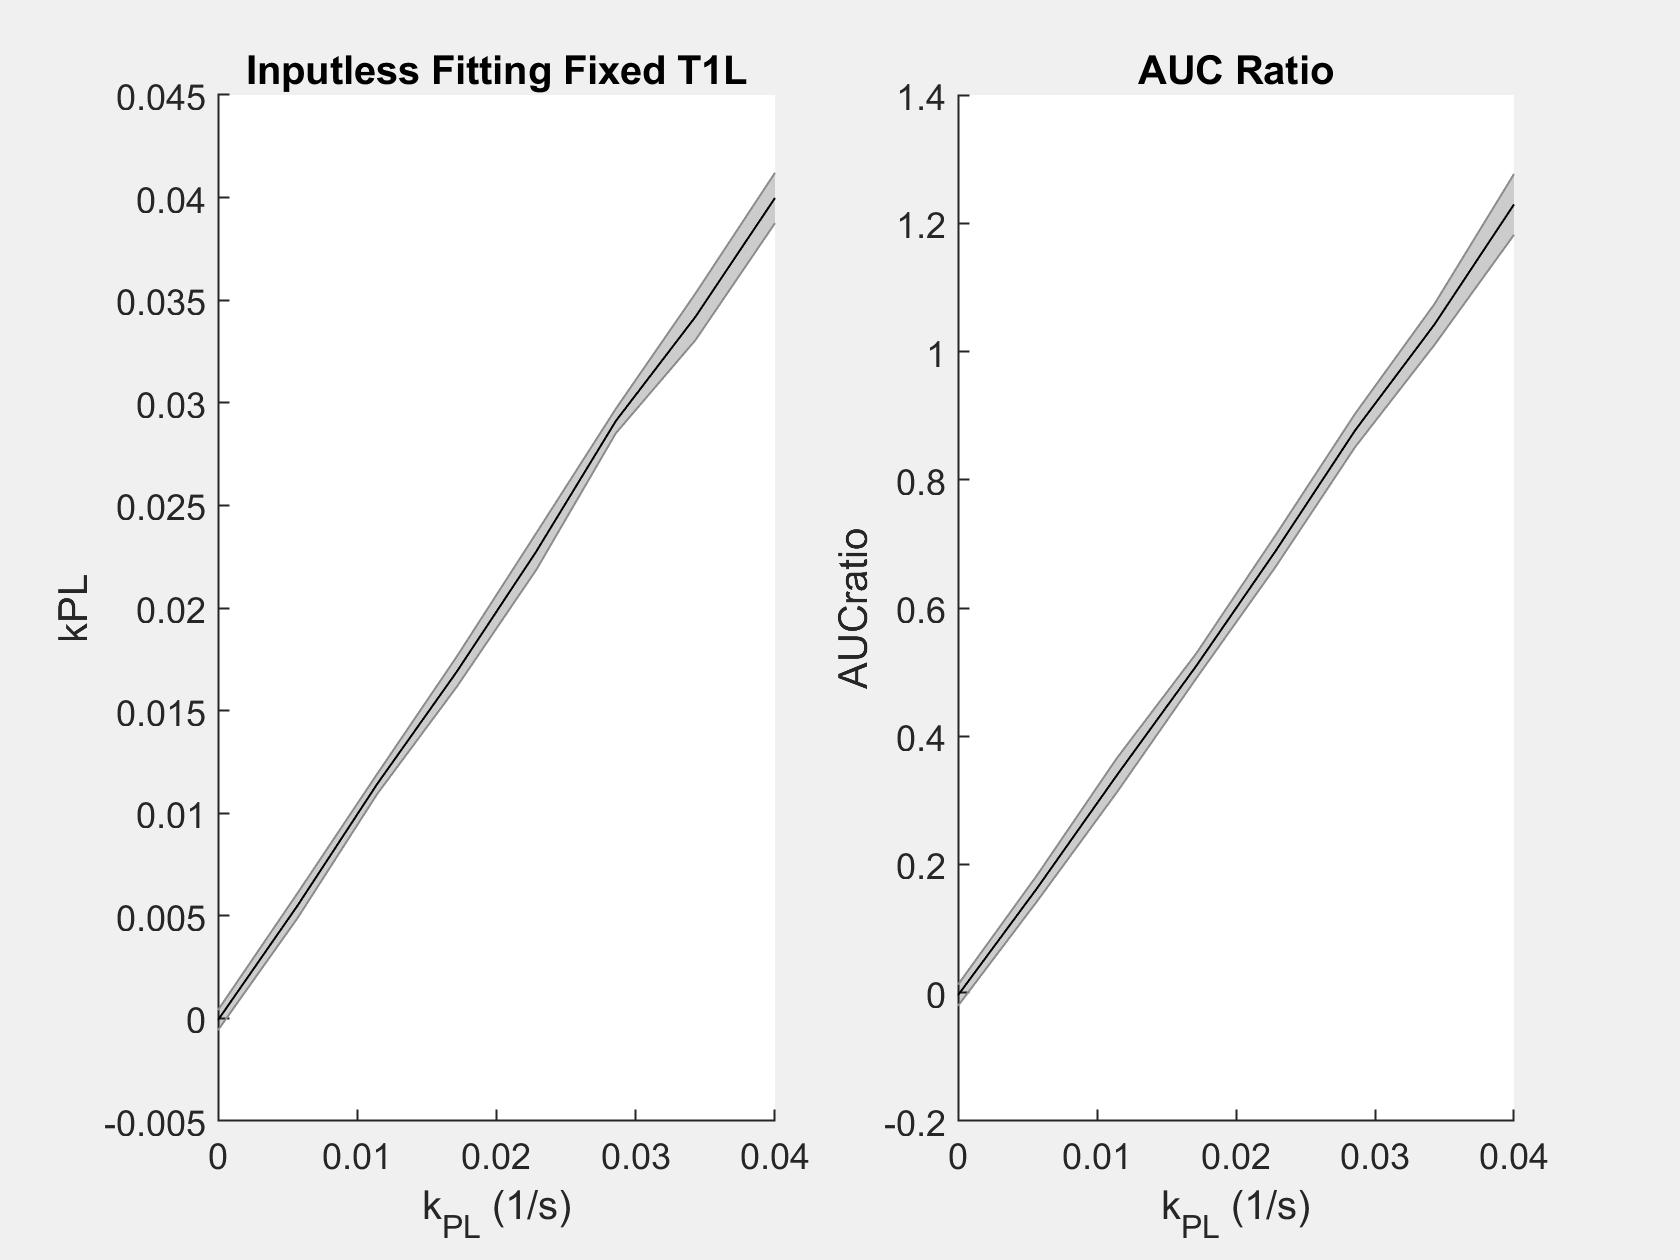

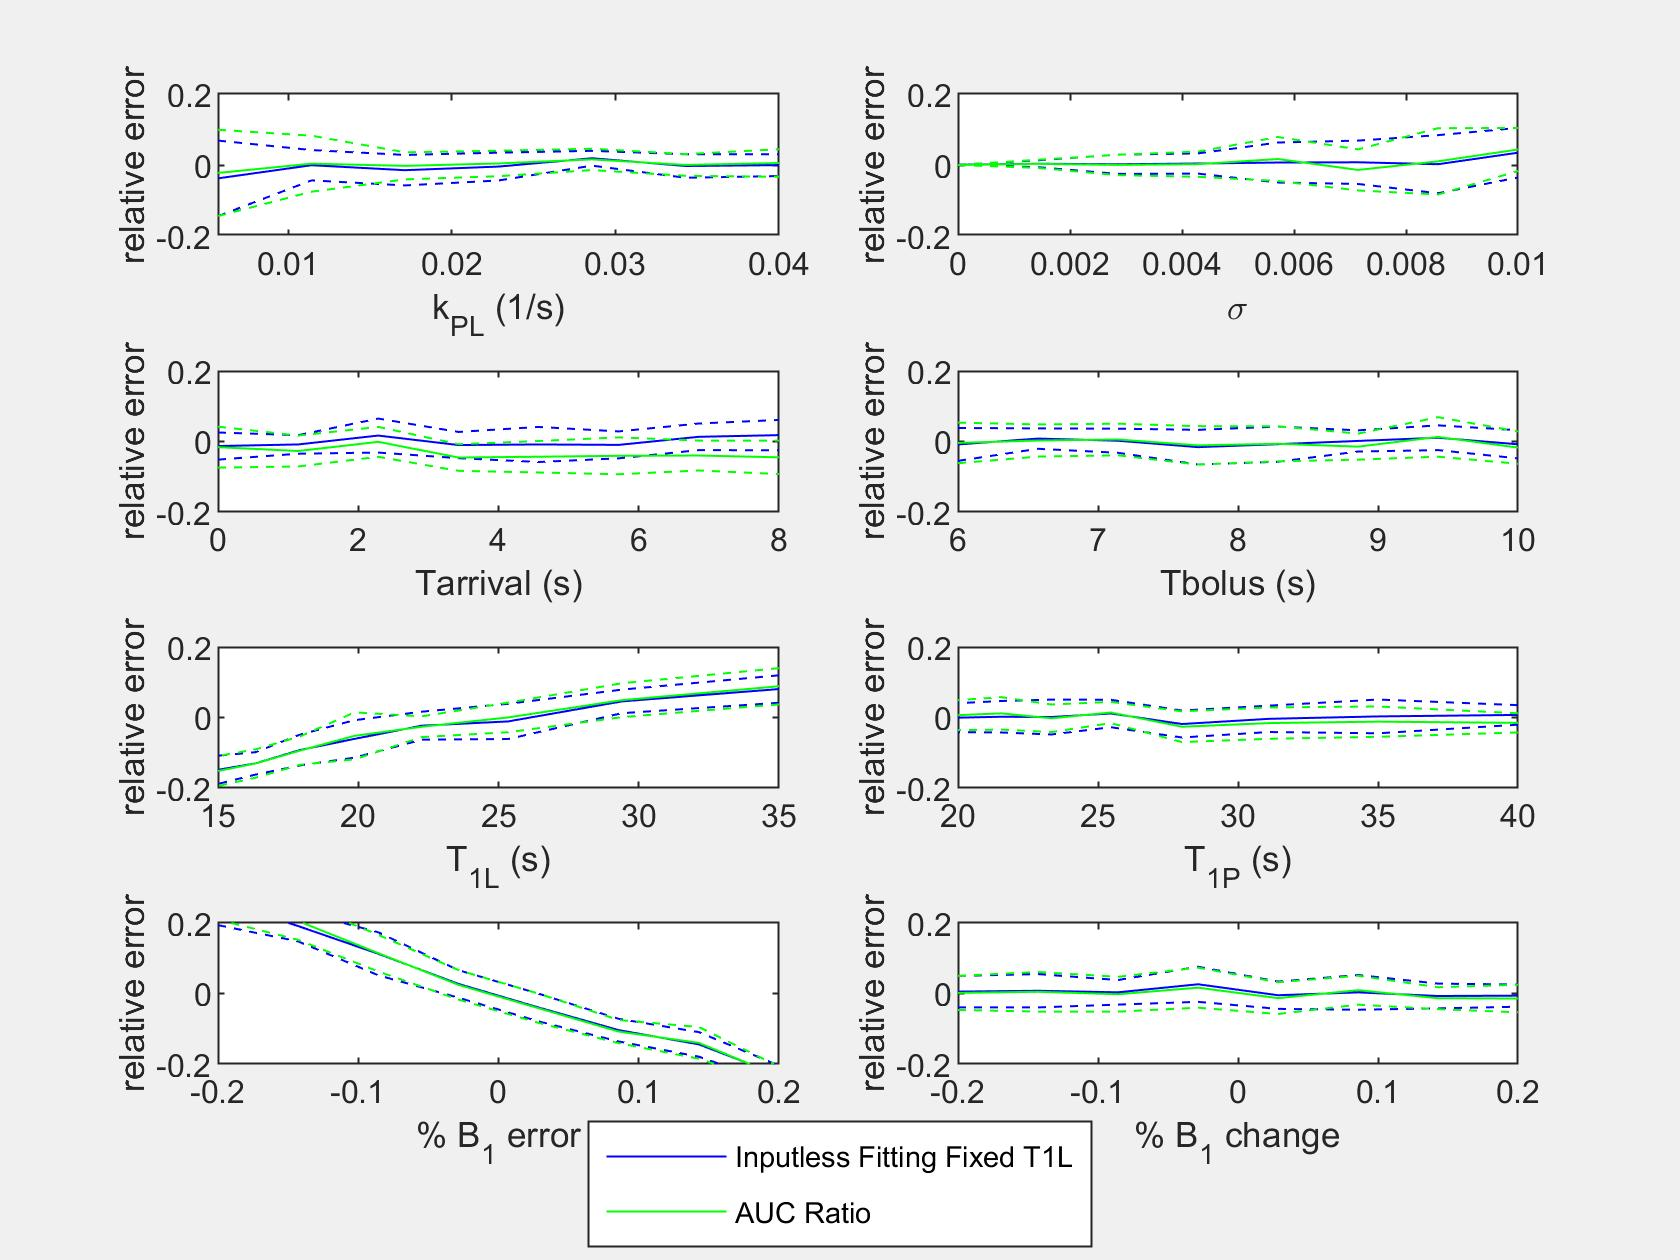

In [5]:
% 1. First, use the HP_montecarlo_evaluation.m function to compare inputless kPL fitting (@fit_pyr_kinetics) to 
% the AUC ratio (@compute_AUCratio) with the given parameters (above). 
% To start, fix pyruvate T1 and lactate T1 and fit kPL. 
% See test_HP_montecarlo_evaluation.m for an example

% define experiment parameters ex. experiment.R1L = 1/25 ... 
experiment.NMC = 20;
experiment.R1P = 1/25;
experiment.R1L = 1/25;
experiment.kPL = 0.02;
experiment.std_noise = 0.005;
experiment.Tarrival = 0;
experiment.Tbolus = 8;

% define acquisition parameters and flip angles
acq.TR = 3;
acq.N = 16;
acq.flips = repmat([10*pi/180; 40*pi/180], [1 acq.N]);

% define fitting parameters -- assume you estimate the parameters correctly i.e. fitting estimates = experiment parameters

% inputless kPL fitting
R1P_est = 1/25; R1L_est = 1/25; kPL_est = 0.02;
params_fixed.R1P = R1P_est; params_fixed.R1L = R1L_est;
params_est.kPL = kPL_est;
fitting(1).fit_fcn = @fit_pyr_kinetics;
fitting(1).params_fixed = params_fixed;
fitting(1).params_est = params_est;
fitting(1).fit_description = ['Inputless Fitting Fixed T1L'];
fitting(1).metric = 'kPL';

%AUC ratio
fitting(2).fit_fcn = @compute_AUCratio;
fitting(2).metric = 'AUCratio';  
fitting(2).fit_description = ['AUC Ratio'];

% run the function
[results, hdata, hsim] = HP_montecarlo_evaluation(acq, fitting, experiment);

In [7]:
% display the components of results.kPL_test

disp('kPL test:')
results.kPL_test.kPL_test
disp('metric mean:')
results.kPL_test.metric_mean
disp('metric std:')
results.kPL_test.metric_std

kPL test:

ans =

         0
    0.0057
    0.0114
    0.0171
    0.0229
    0.0286
    0.0343
    0.0400

metric mean:

ans =

   -0.0001    0.0055    0.0114    0.0169    0.0228    0.0291    0.0342    0.0400
   -0.0038    0.1638    0.3392    0.5097    0.6892    0.8771    1.0424    1.2294

metric std:

ans =

    0.0005    0.0006    0.0005    0.0007    0.0009    0.0006    0.0011    0.0012
    0.0165    0.0204    0.0267    0.0195    0.0246    0.0260    0.0319    0.0474



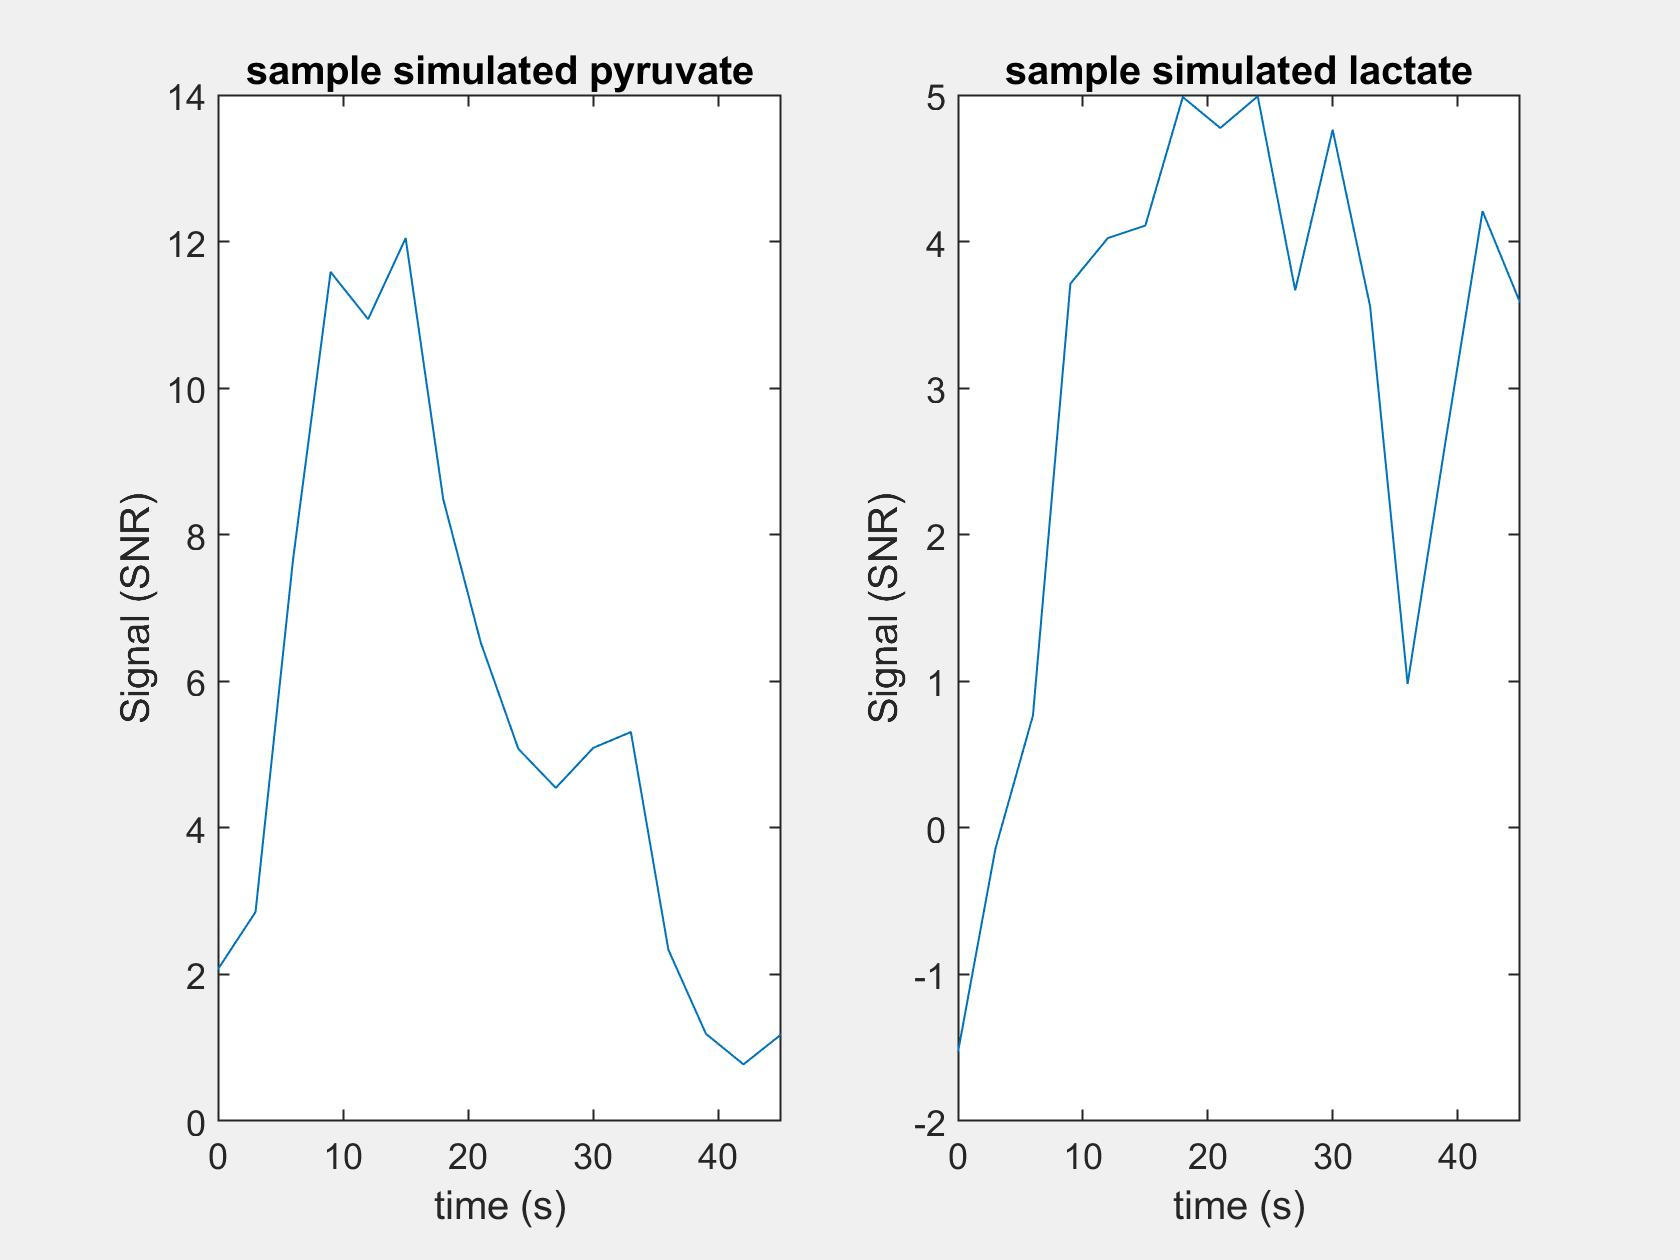

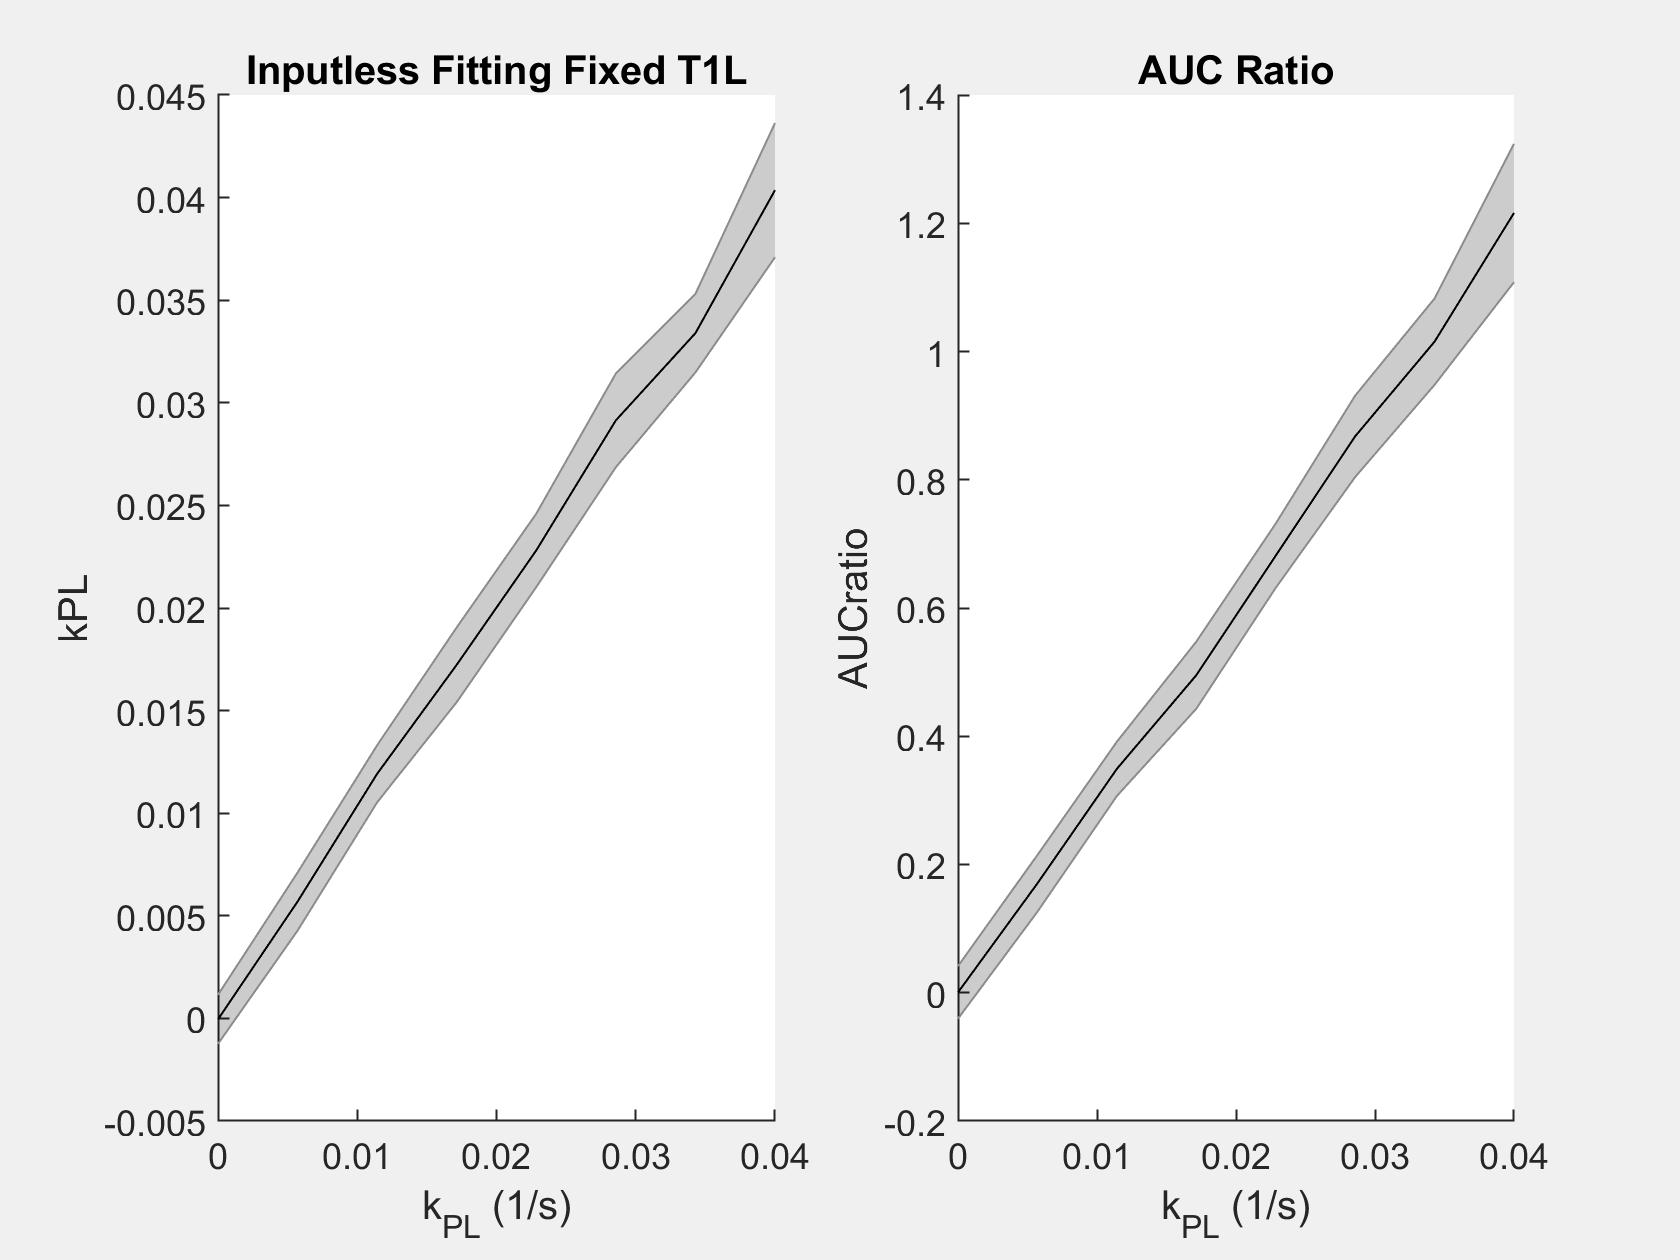

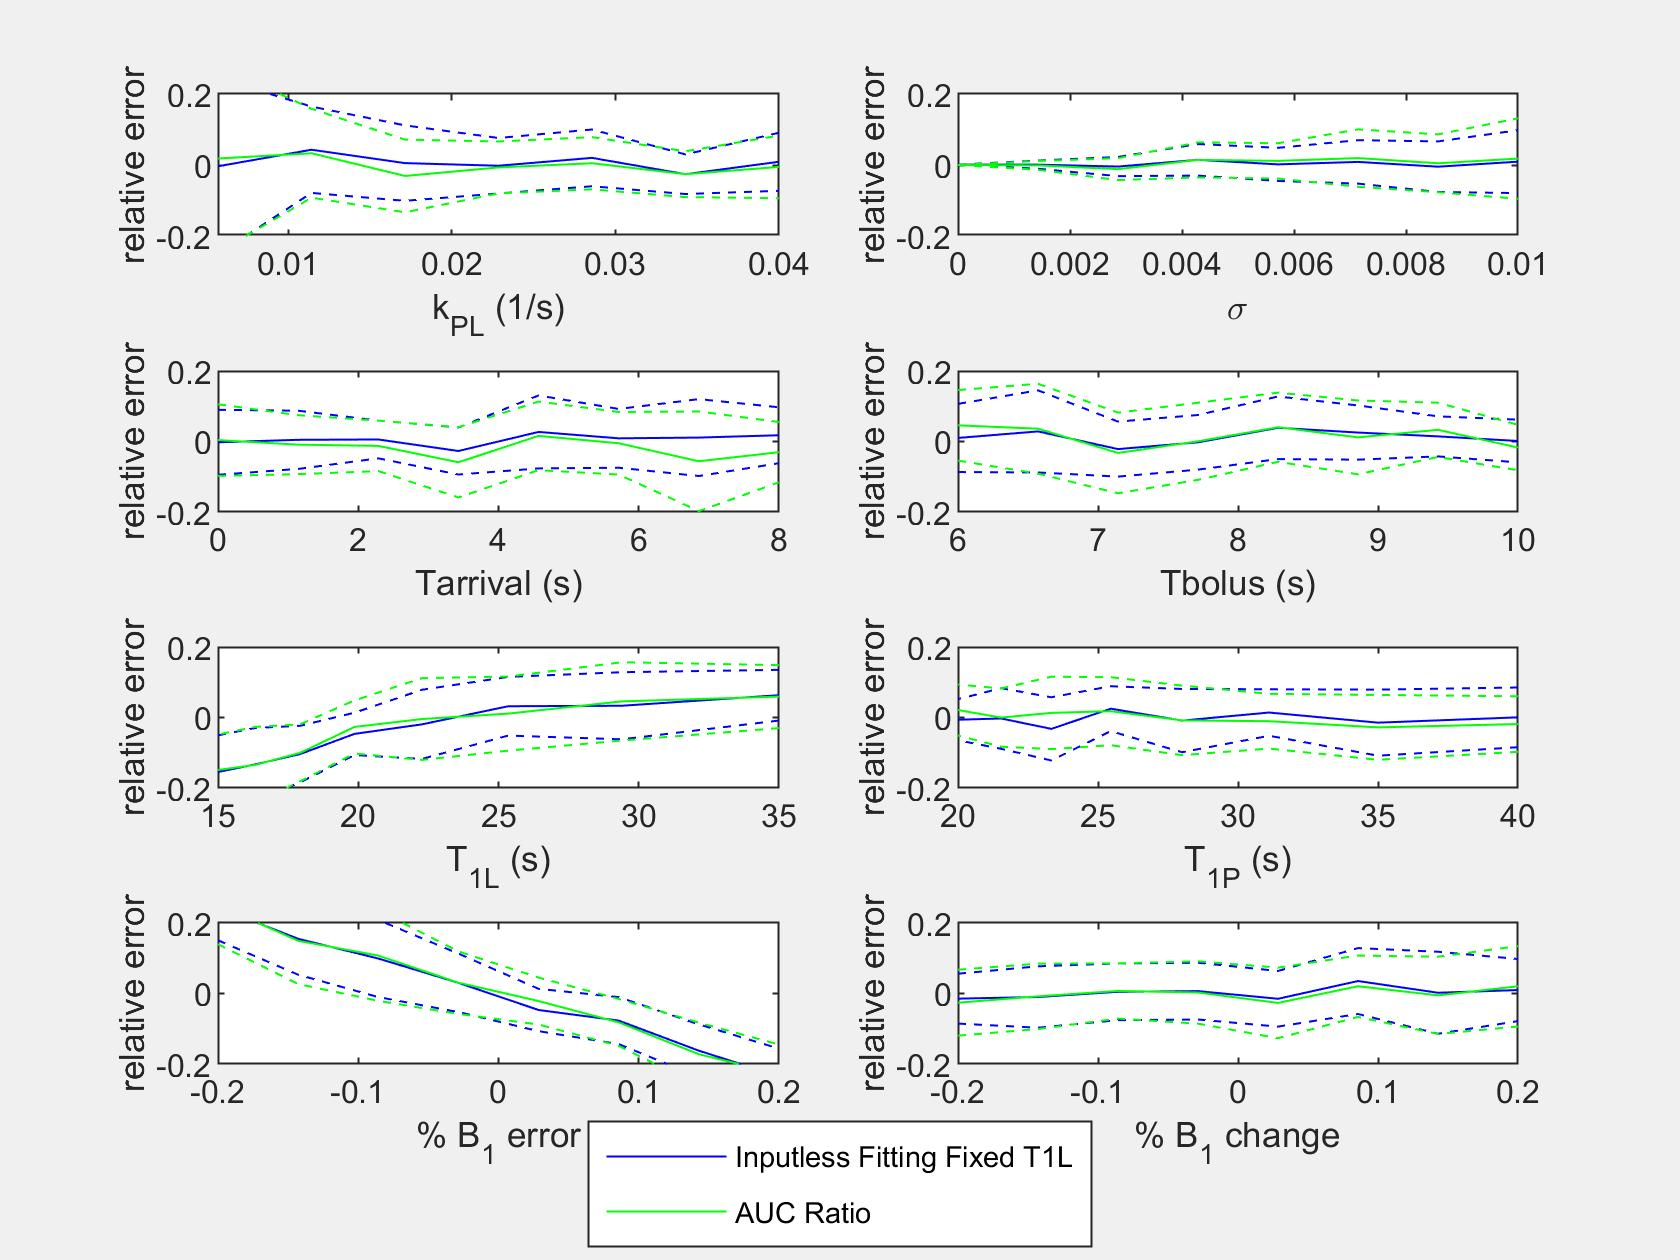

In [8]:
% 2. Increase the experimental noise, what do you expect to happen?
% Run the function again, and compare the plots to the first run
experiment.std_noise = 0.01;

[results, hdata, hsim] = HP_montecarlo_evaluation(acq, fitting, experiment);

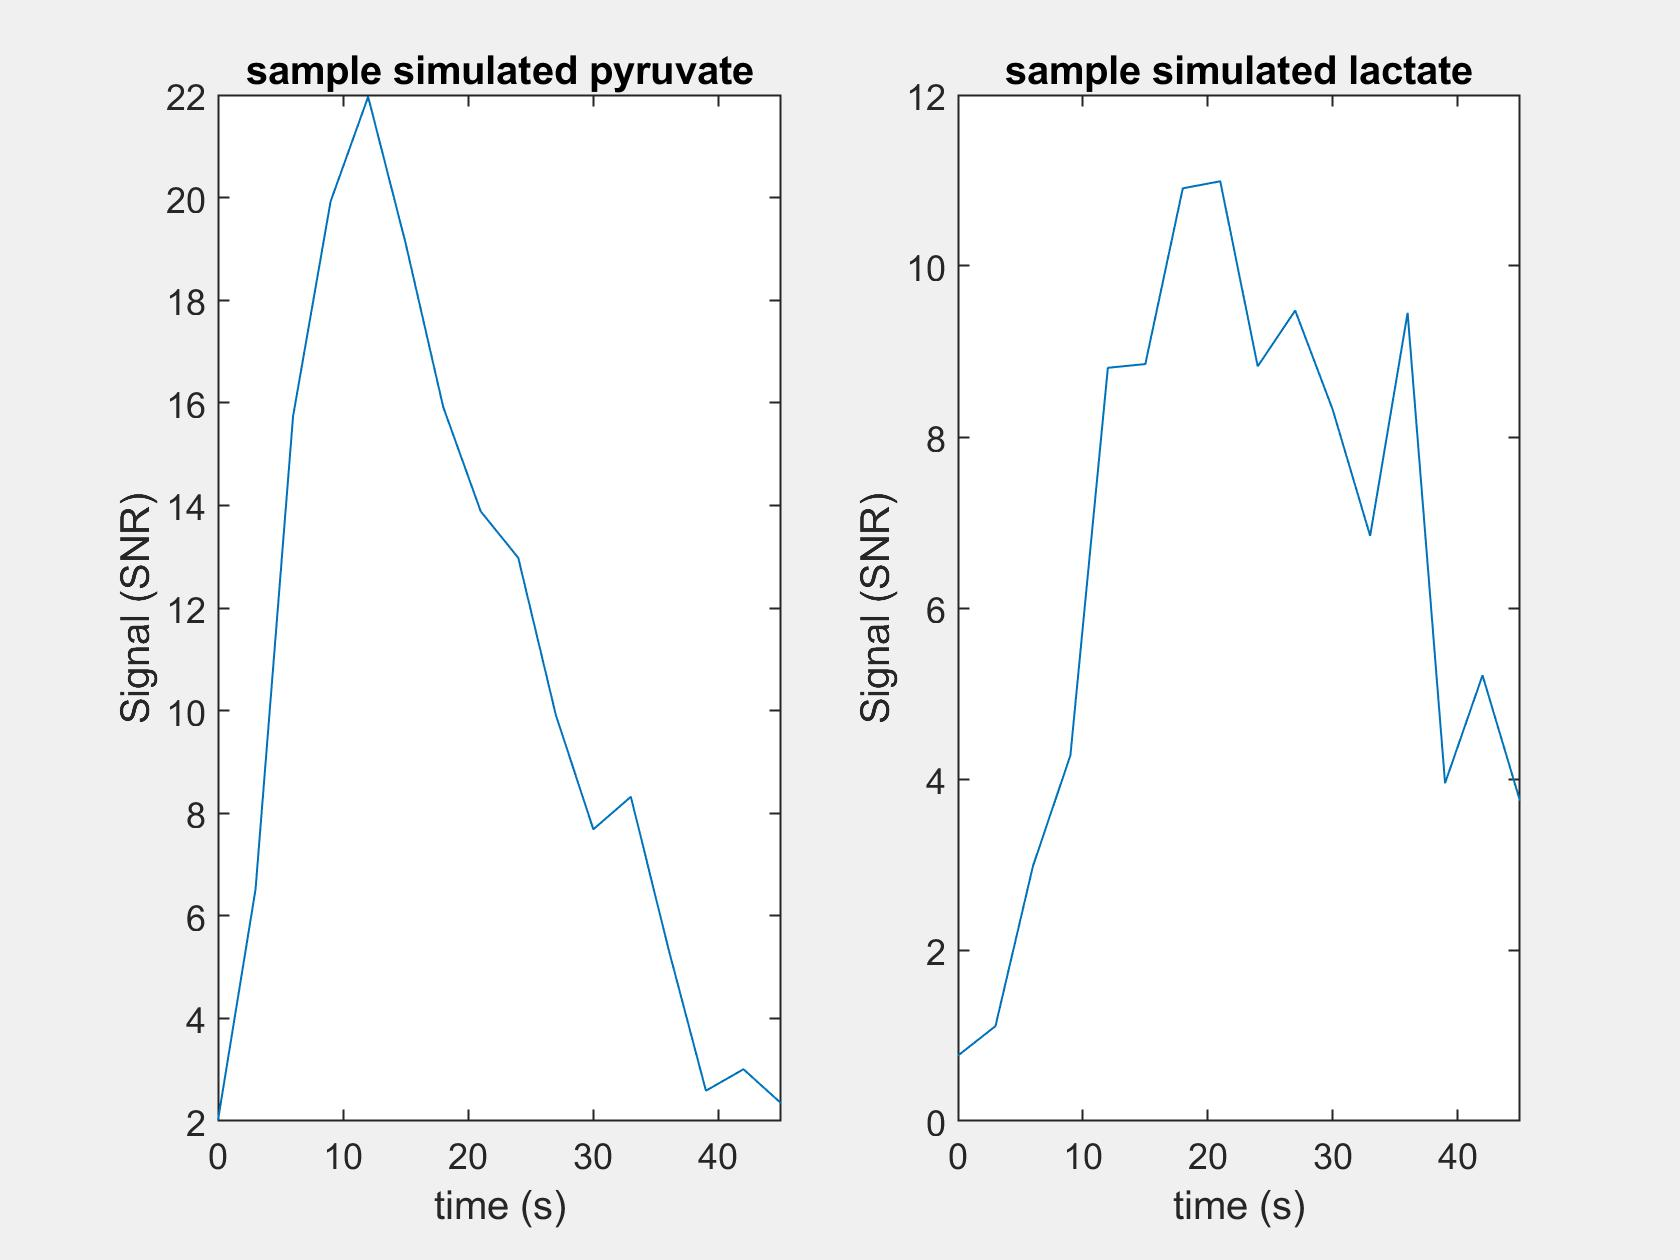

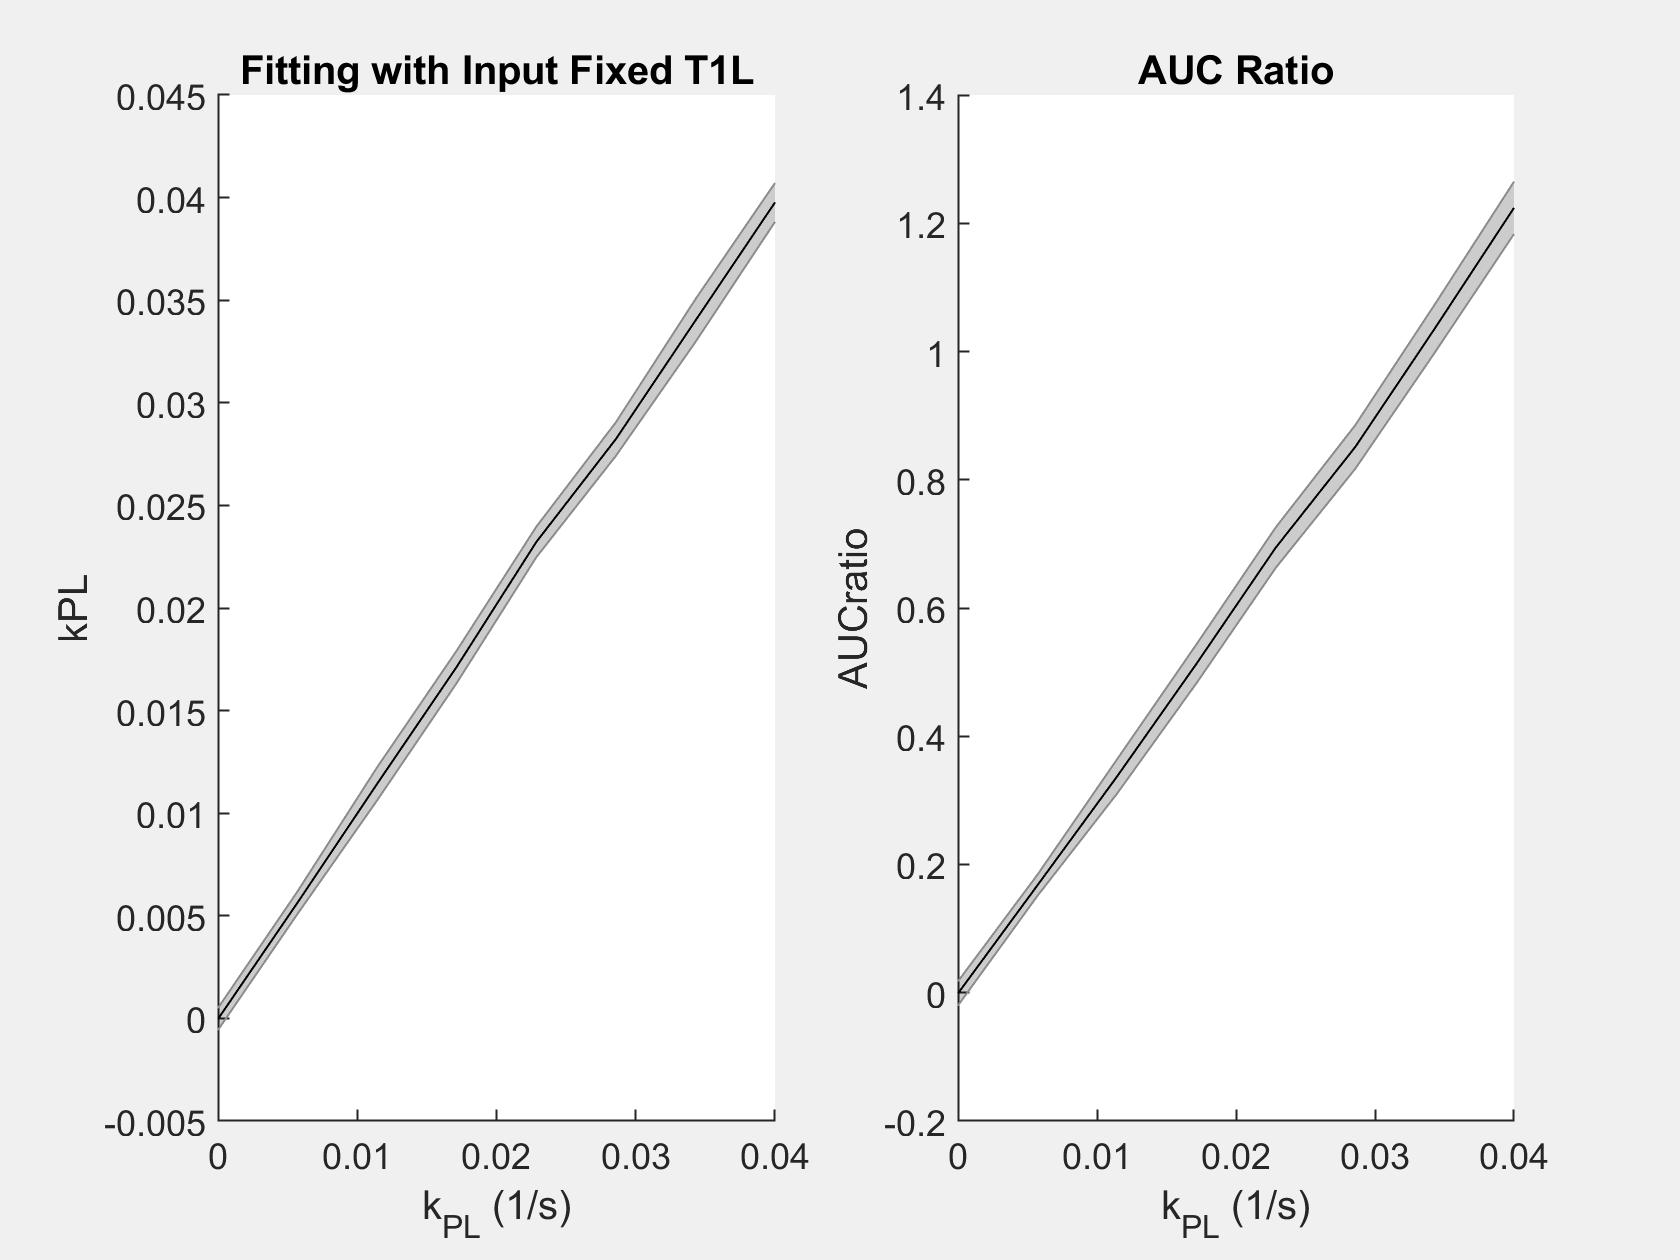

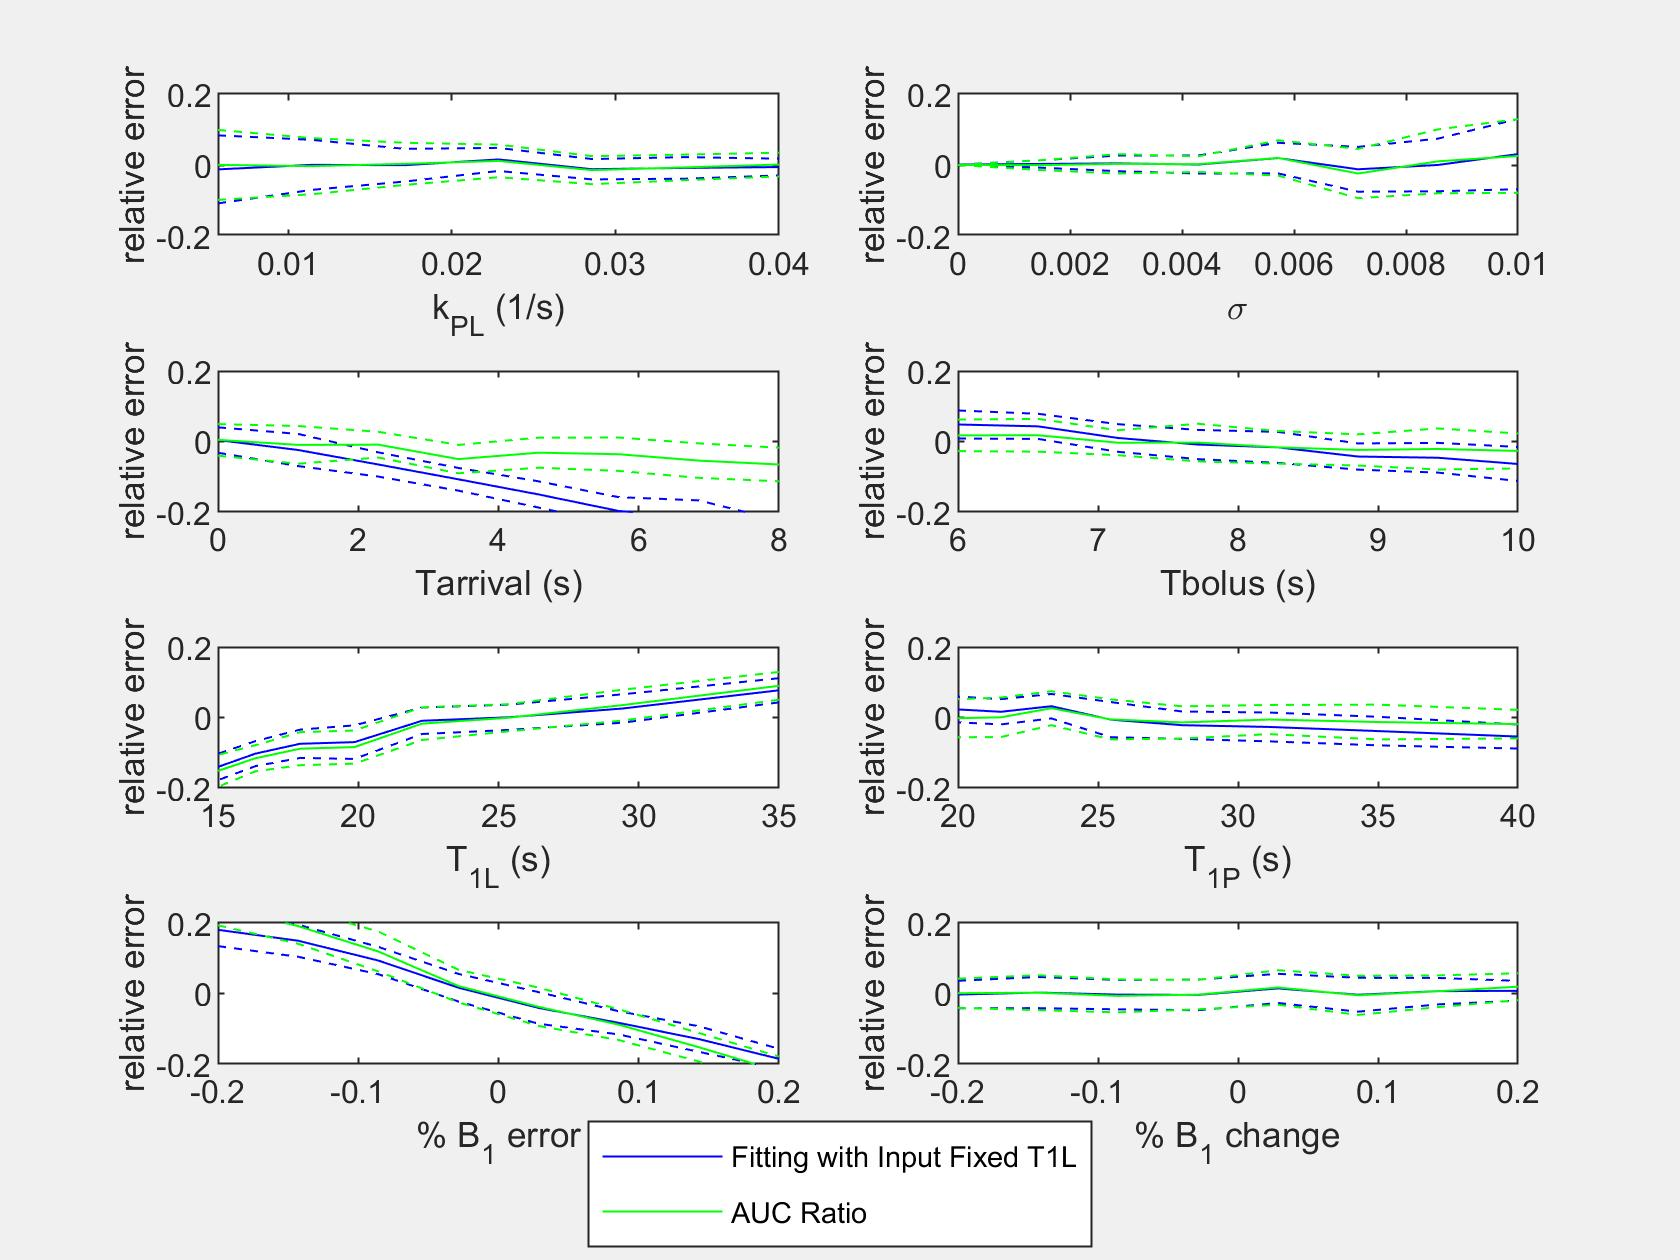

In [10]:
% 3. Set experimental noise back to the original value and try running the 
% montecarlo simulation for kPL fitting with input instead of inputless (@fit_pyr_kinetics_and_input)
experiment.std_noise = 0.005;
clear fitting;

% kPL fitting with input
Tarrival_est = 0; Tbolus_est = 8;
params_fixed.Tarrival = Tarrival_est; 
params_fixed.Tbolus = Tbolus_est;
fitting(1).fit_fcn = @fit_pyr_kinetics_and_input;
fitting(1).params_fixed = params_fixed;
fitting(1).params_est = params_est;
fitting(1).fit_description = ['Fitting with Input Fixed T1L'];
fitting(1).metric = 'kPL';

%AUC ratio
fitting(2).fit_fcn = @compute_AUCratio;
fitting(2).metric = 'AUCratio';  
fitting(2).fit_description = ['AUC Ratio'];

% run the function
[results, hdata, hsim] = HP_montecarlo_evaluation(acq, fitting, experiment);

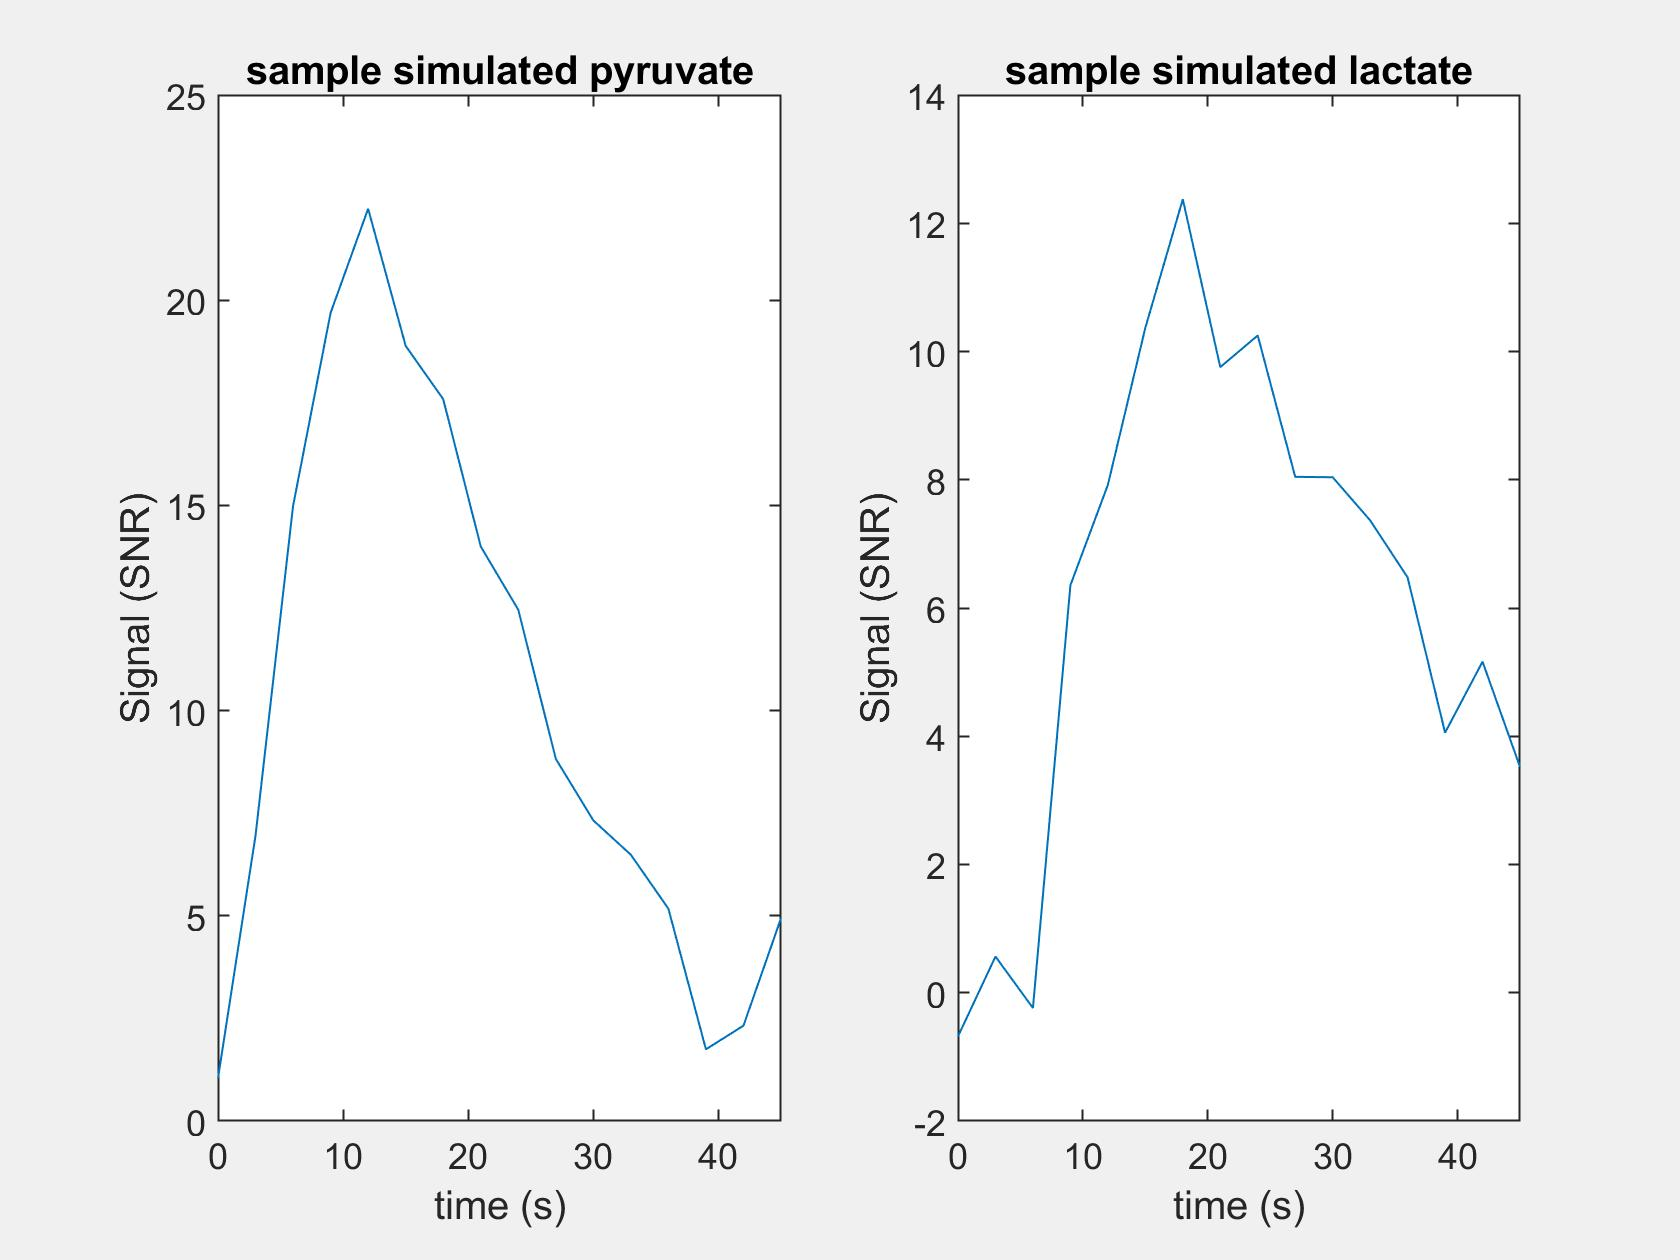

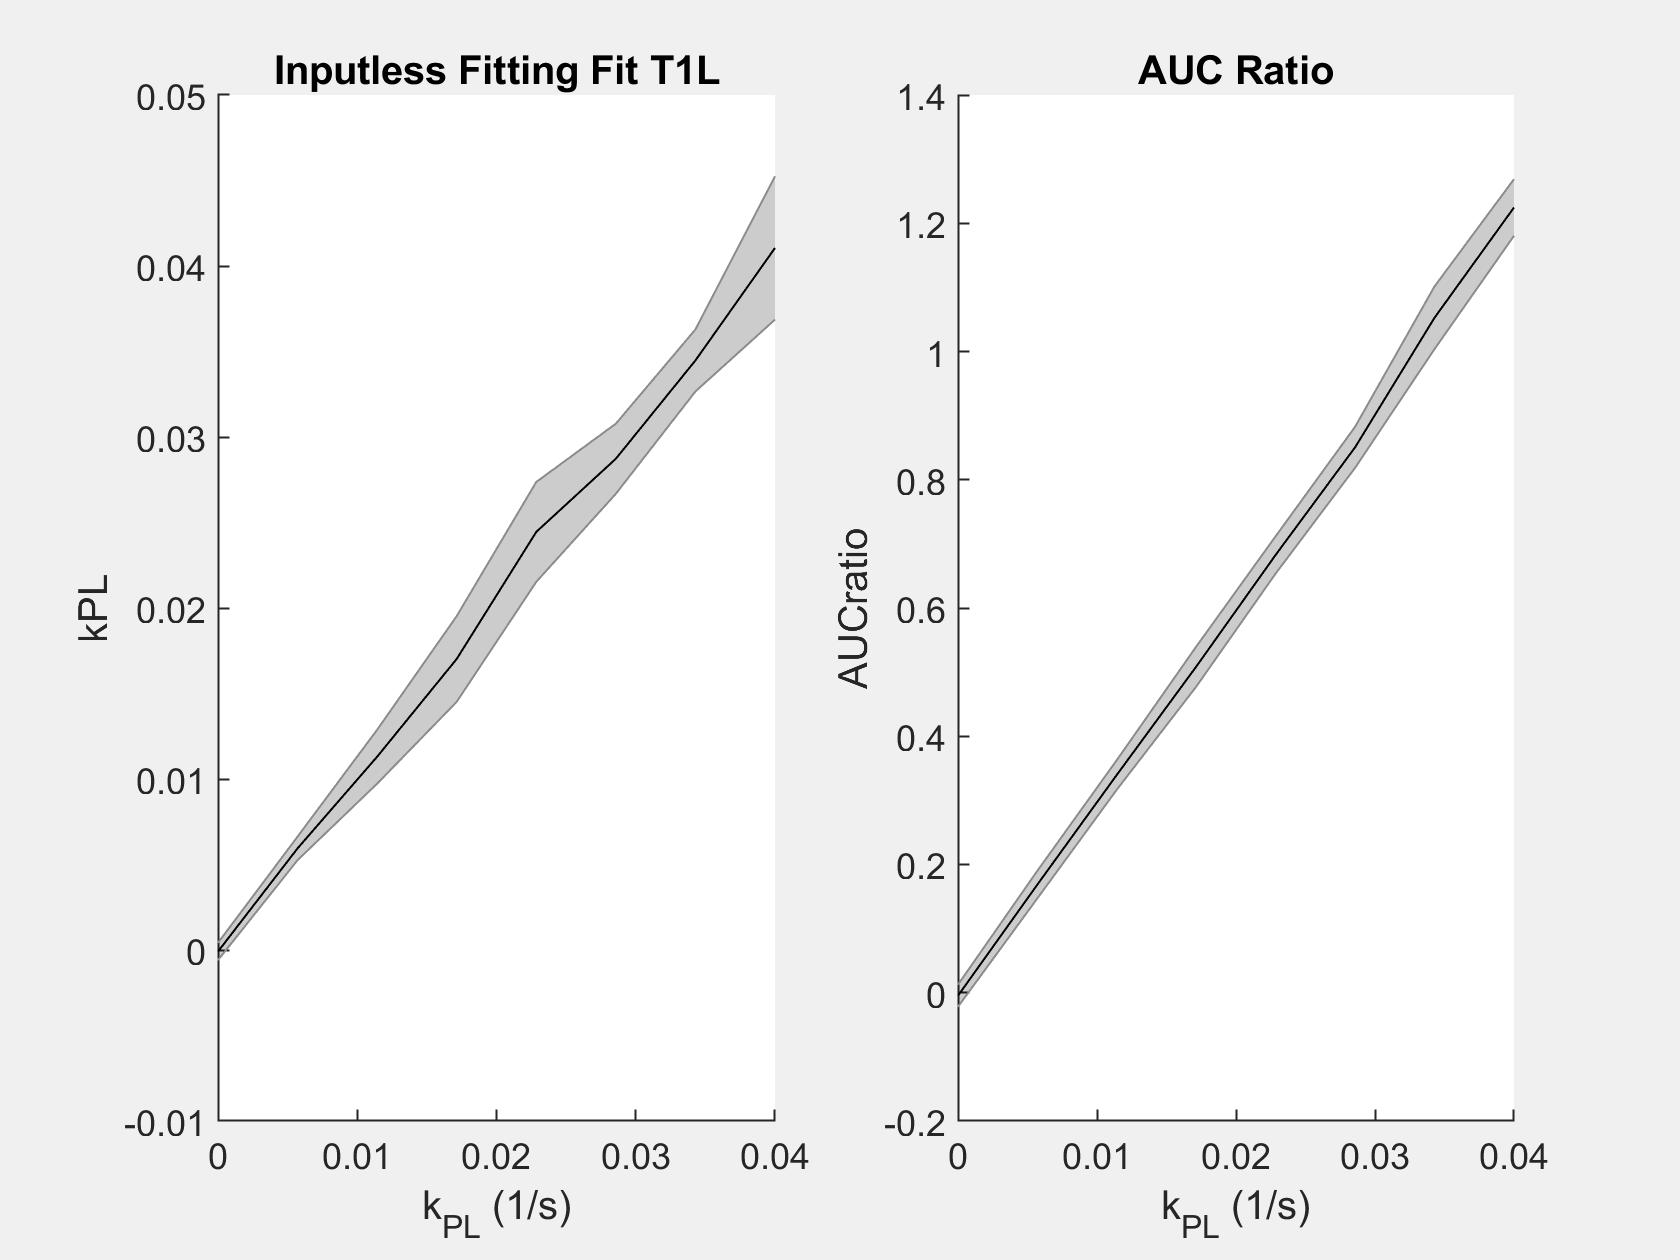

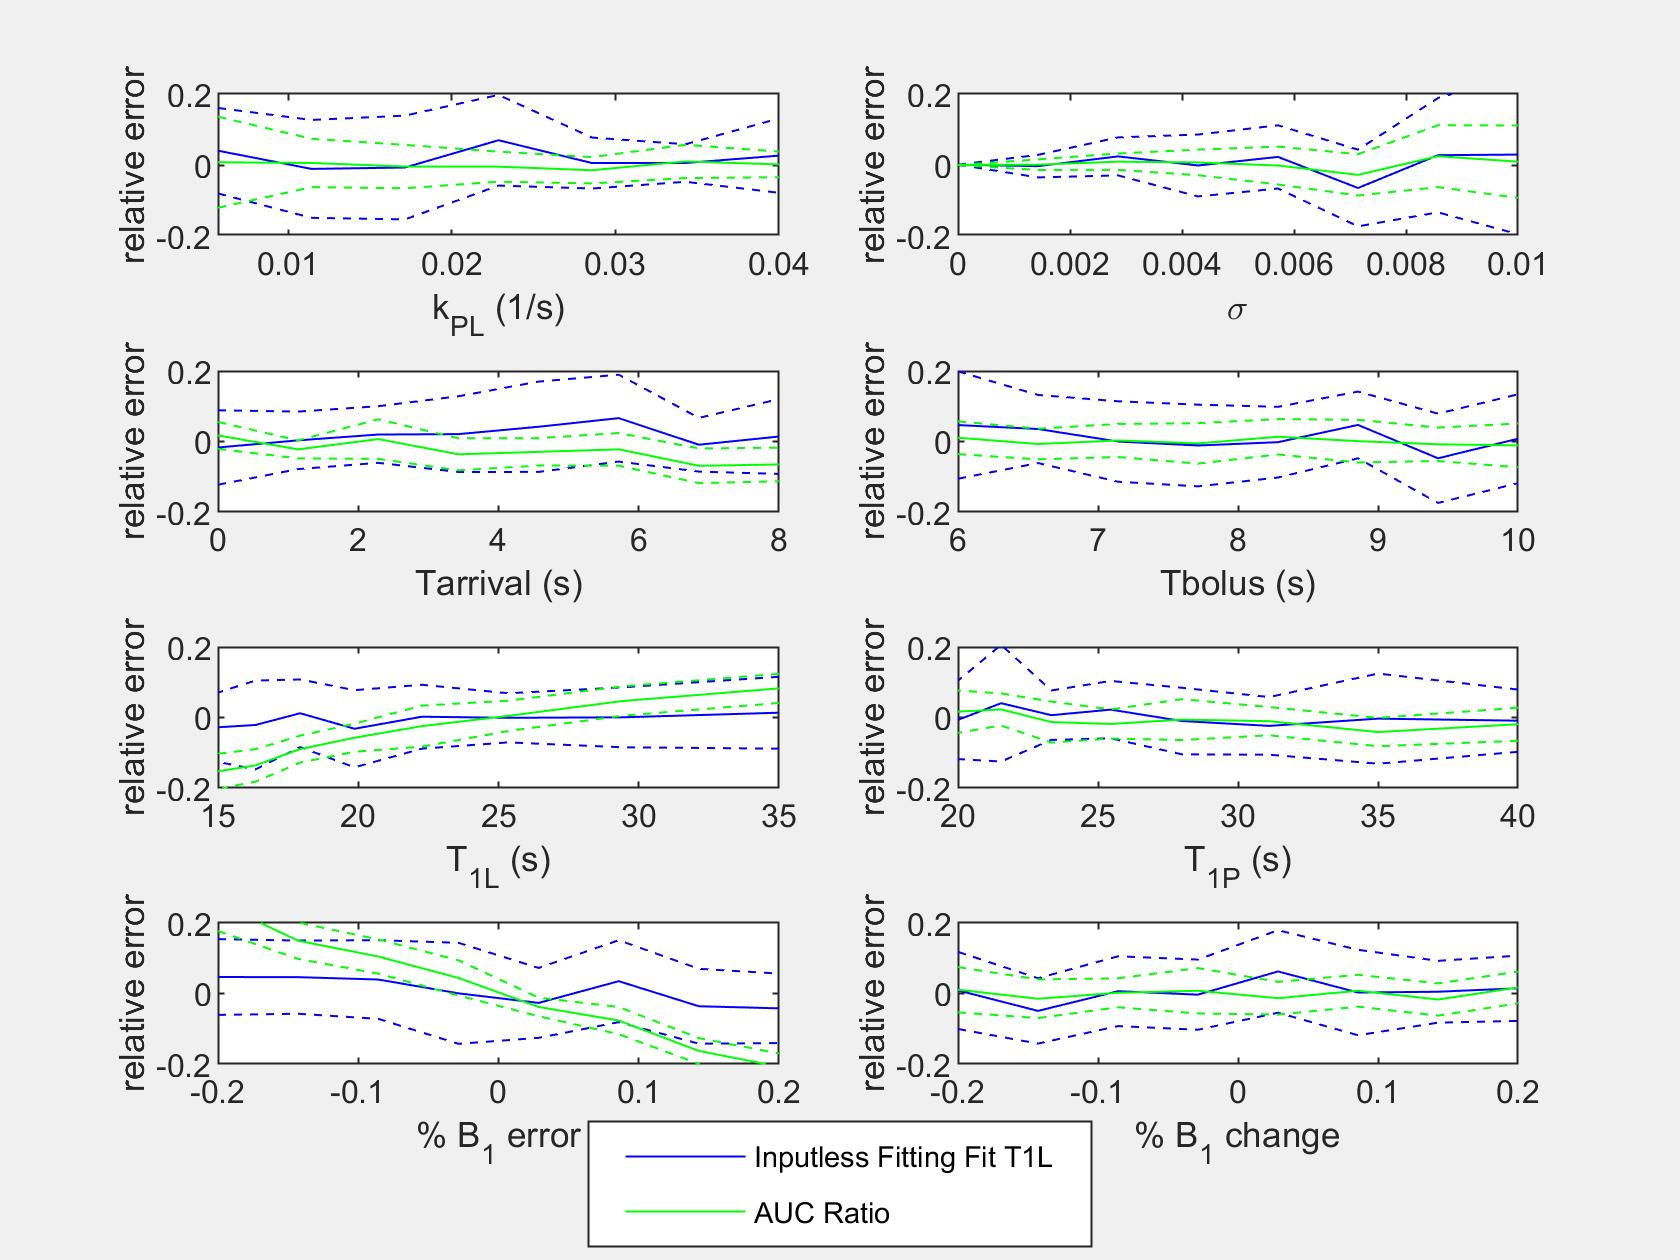

In [13]:
% 4. Run the simulation for inputless fitting while fitting the lactate T1. 
clear fitting params_fixed params_fit;

% inputless kPL fitting
params_fixed.R1P = R1P_est; 
params_est.R1L = R1L_est; %fit lactate T1
params_est.kPL = kPL_est;
fitting(1).fit_fcn = @fit_pyr_kinetics;
fitting(1).params_fixed = params_fixed;
fitting(1).params_est = params_est;
fitting(1).fit_description = ['Inputless Fitting Fit T1L'];
fitting(1).metric = 'kPL';

%AUC ratio
fitting(2).fit_fcn = @compute_AUCratio;
fitting(2).metric = 'AUCratio';  
fitting(2).fit_description = ['AUC Ratio'];

% run the function
[results, hdata, hsim] = HP_montecarlo_evaluation(acq, fitting, experiment);

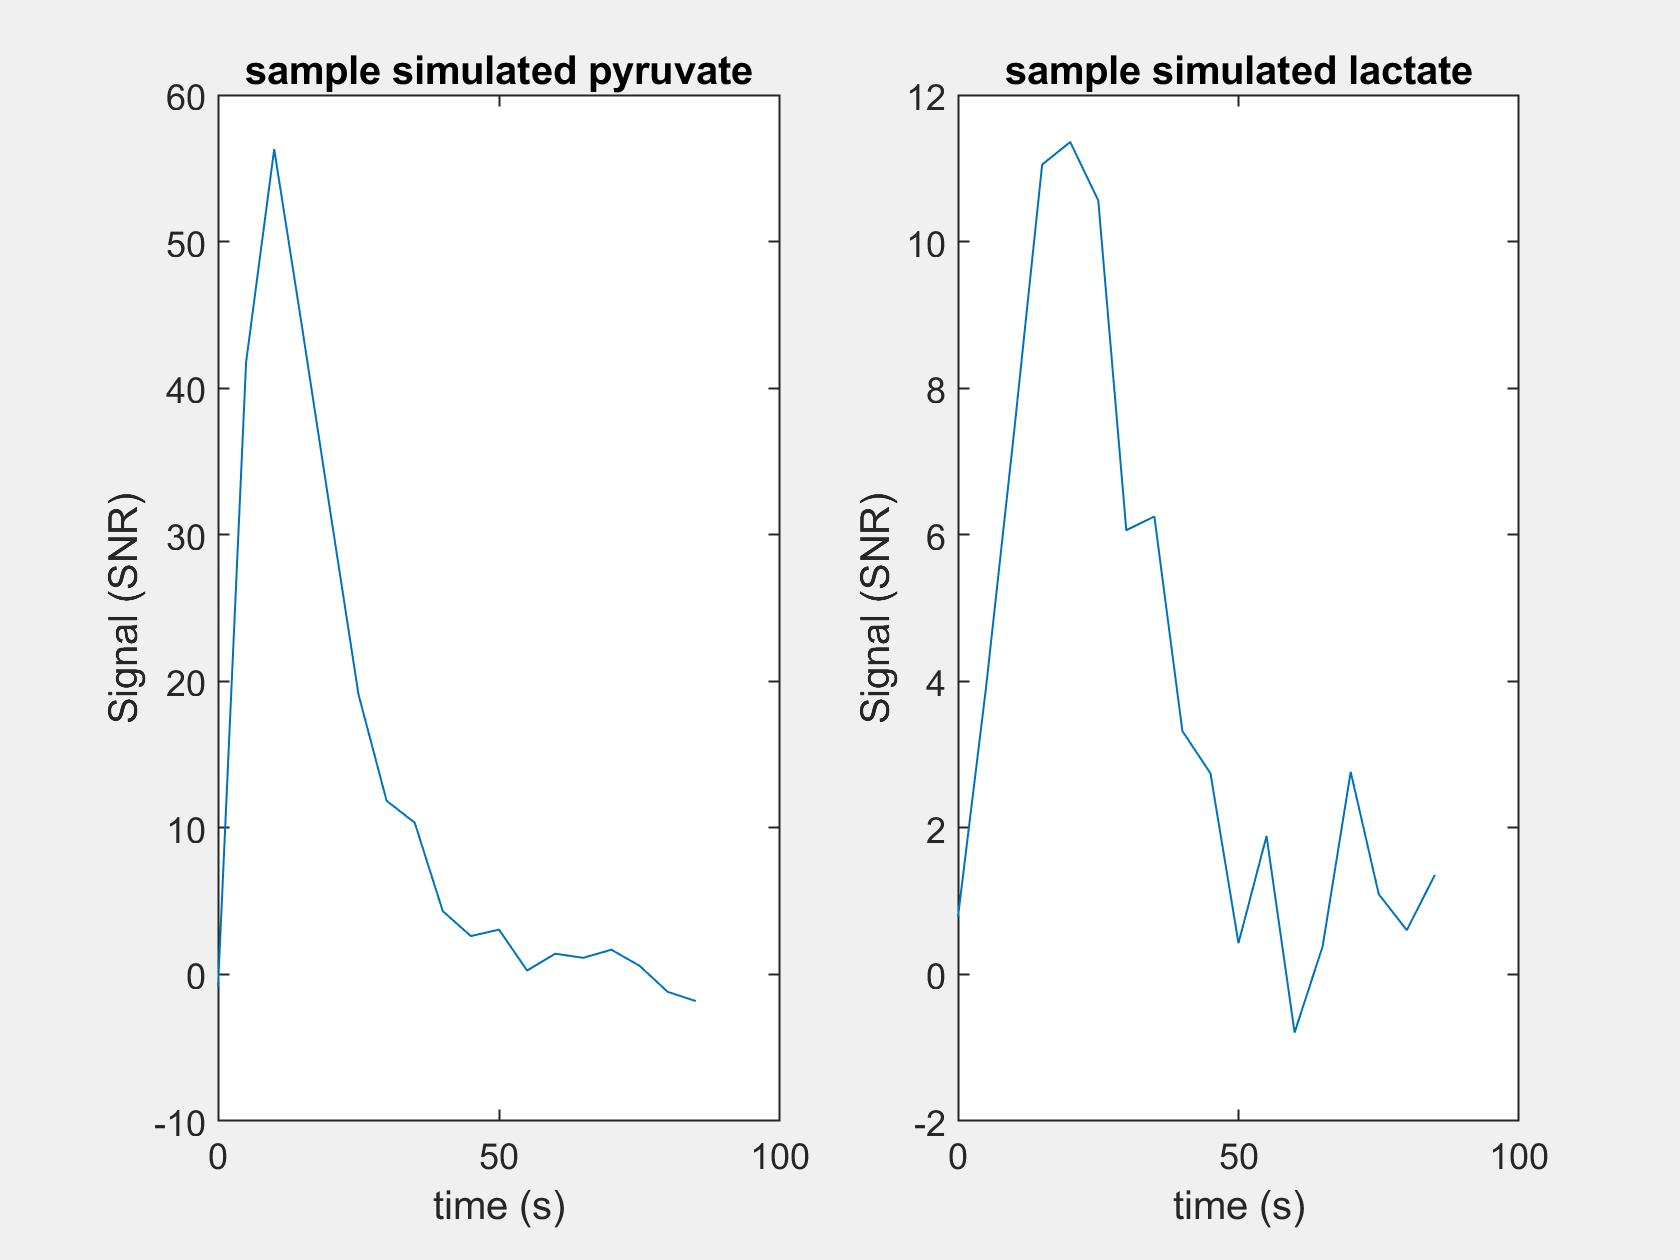

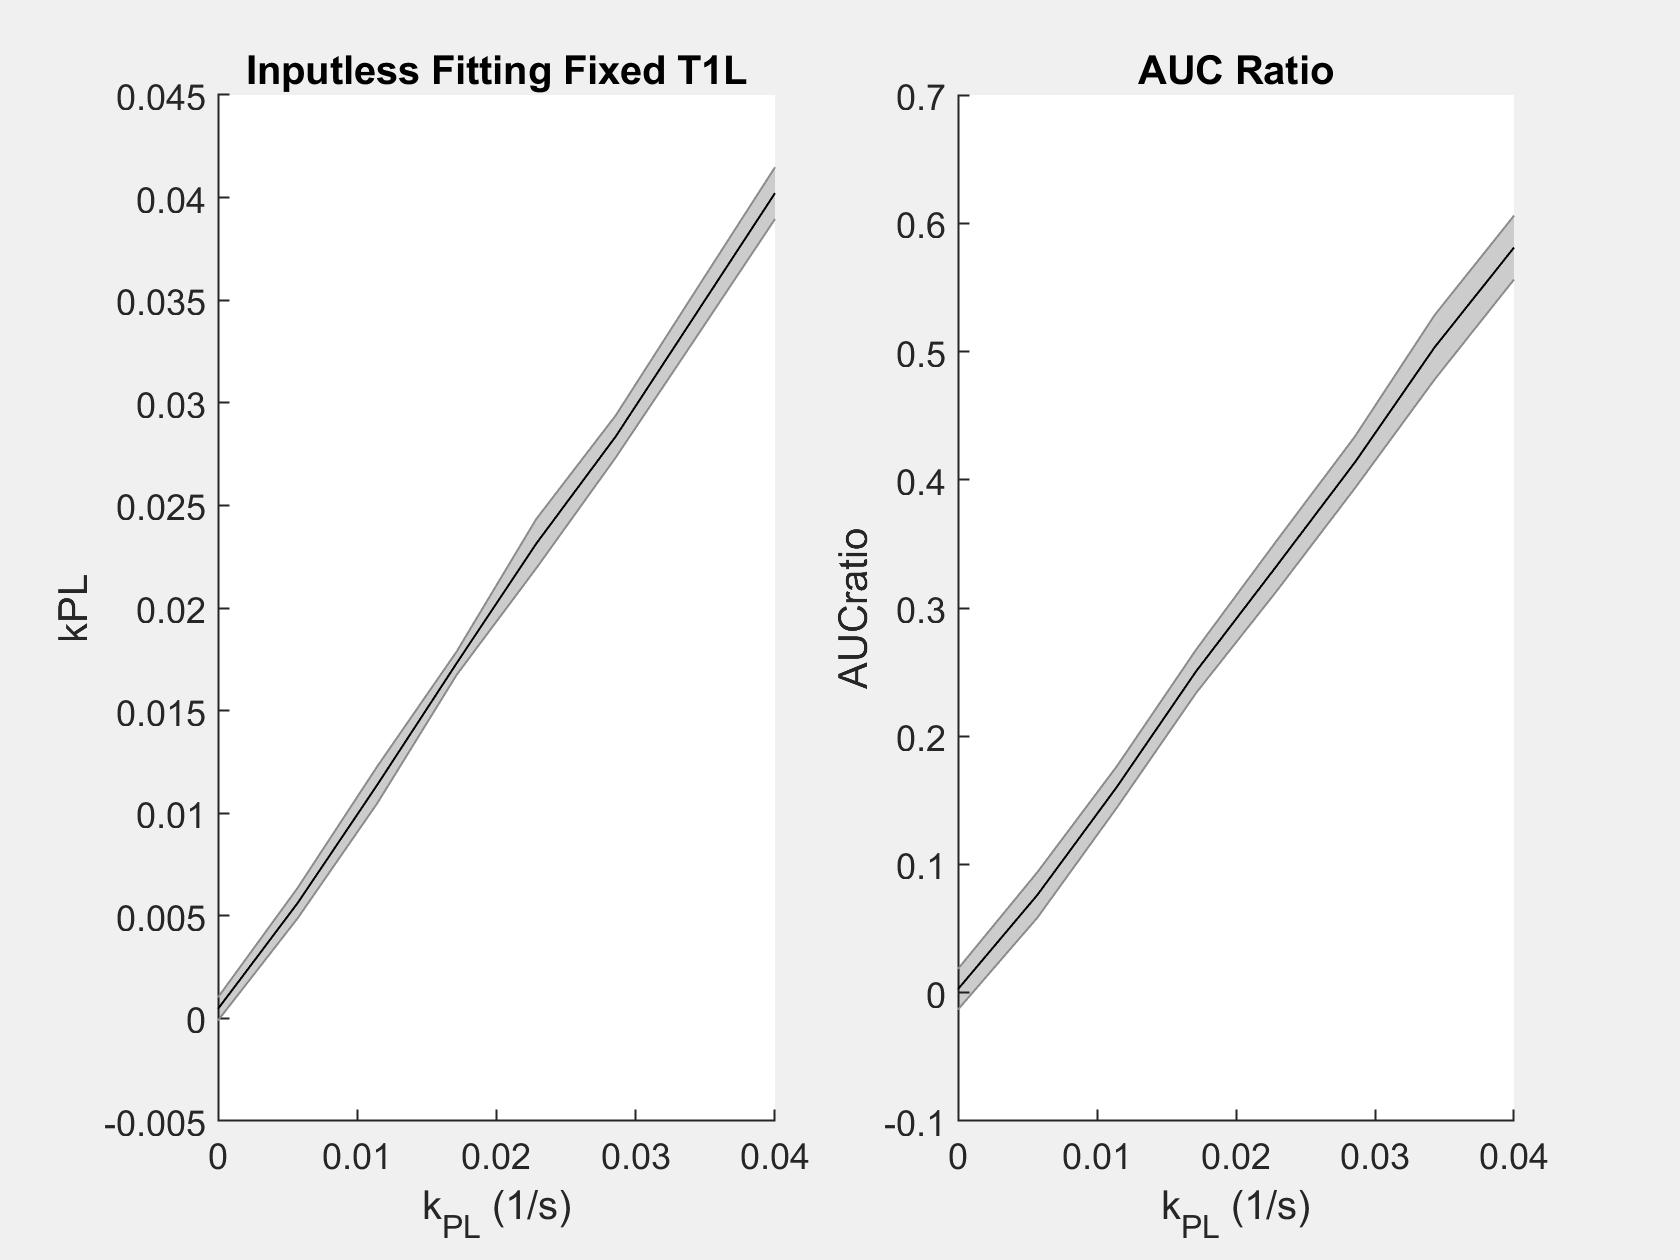

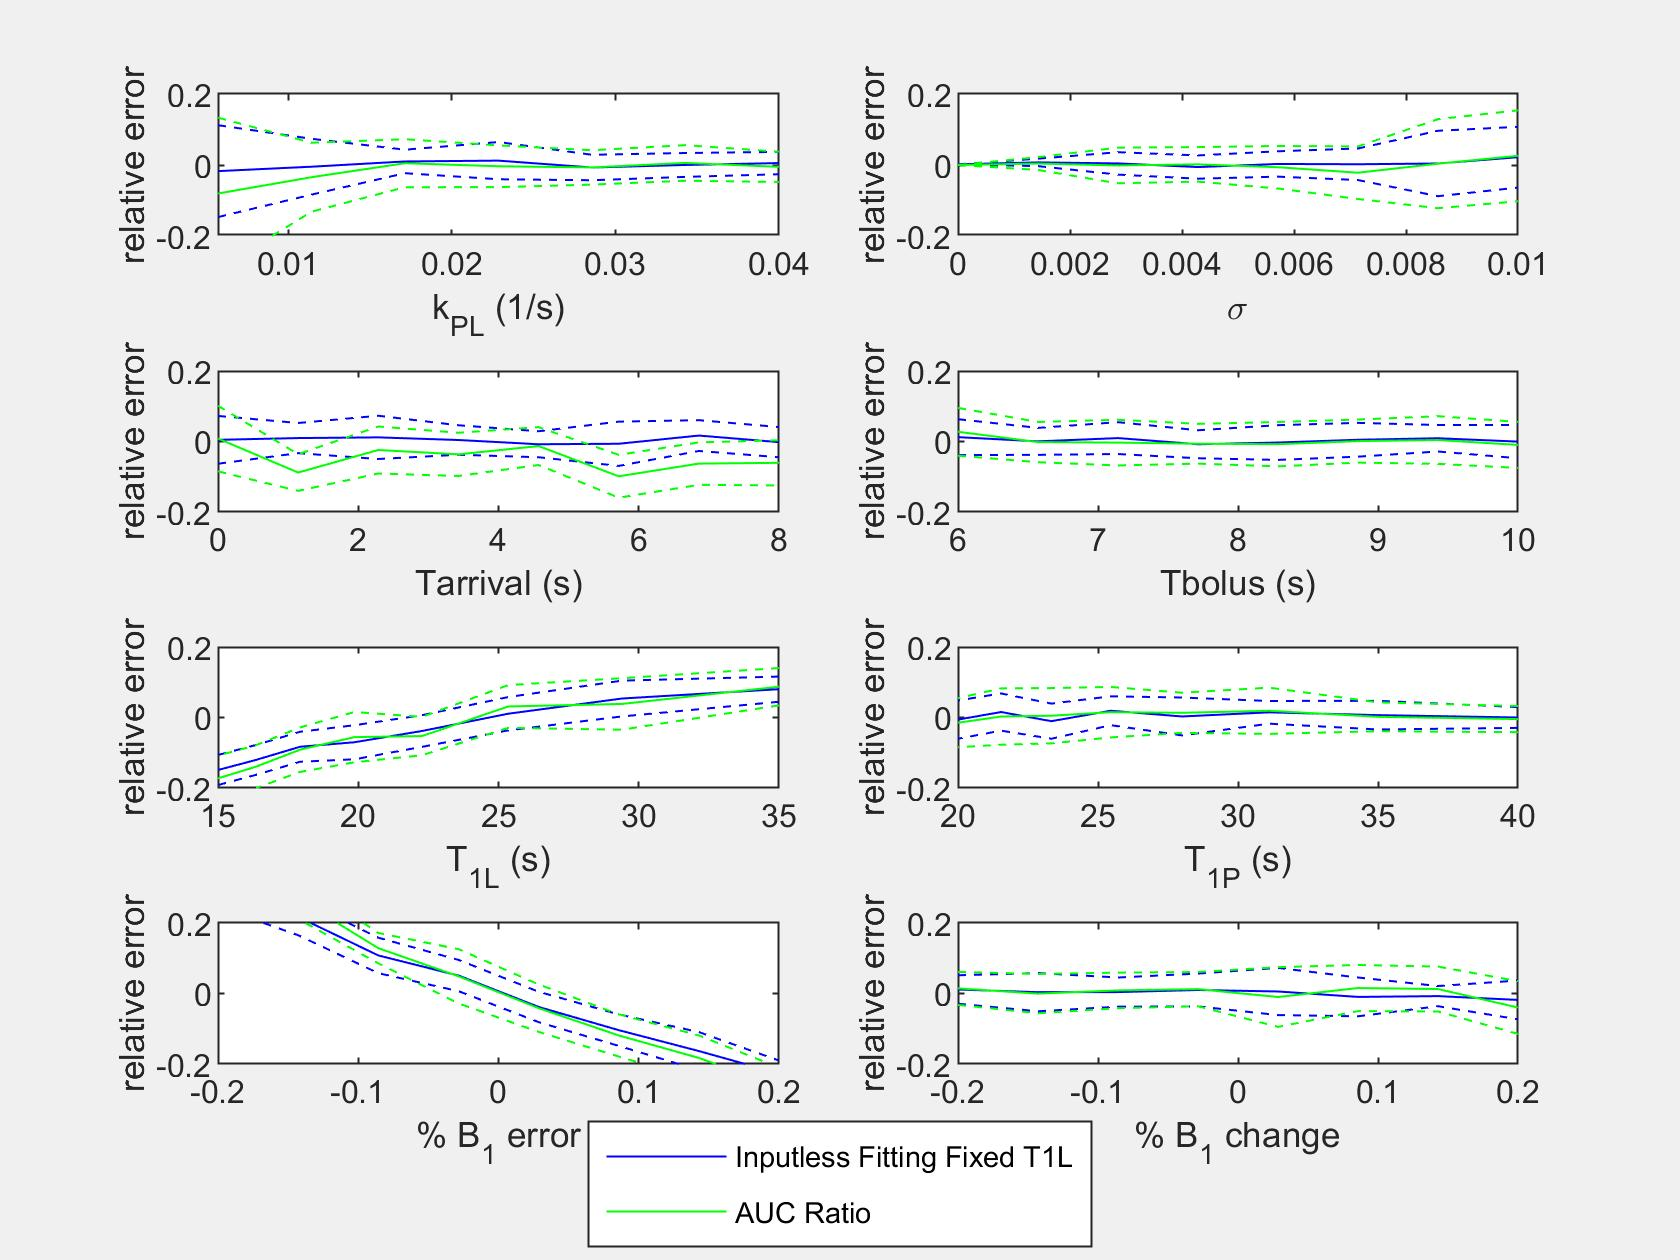

In [14]:
% 5. Try another flip scheme (#2, #3 or test your own). You can also try changing the number of phase encodes and/or TR.
% How does the inputless fitting function compare to the AUC ratio with 
% more complicated flip angle schemes? 

clear acq fitting params_fixed params_fit;

% 2D dynamic 10/20 flips with 8 phase encodes (flip scheme #3 from test_HP_montecarlo_evaluation.m)
Tacq = 90; acq.TR = 5; acq.N = Tacq/acq.TR;
Npe = 8; Nall = acq.N * Npe;
acq.flips(1:2,1:acq.N) = repmat(acos(cos([10*pi/180; 20*pi/180]).^Npe), [1 acq.N]);

% inputless kPL fitting
params_fixed.R1P = R1P_est; params_fixed.R1L = R1L_est; 
params_est.kPL = kPL_est;
fitting(1).fit_fcn = @fit_pyr_kinetics;
fitting(1).params_fixed = params_fixed;
fitting(1).params_est = params_est;
fitting(1).fit_description = ['Inputless Fitting Fixed T1L'];
fitting(1).metric = 'kPL';

%AUC ratio
fitting(2).fit_fcn = @compute_AUCratio;
fitting(2).metric = 'AUCratio';  
fitting(2).fit_description = ['AUC Ratio'];

% run the function
[results, hdata, hsim] = HP_montecarlo_evaluation(acq, fitting, experiment);

## Exercise: Comparing Multiple Fitting Methods

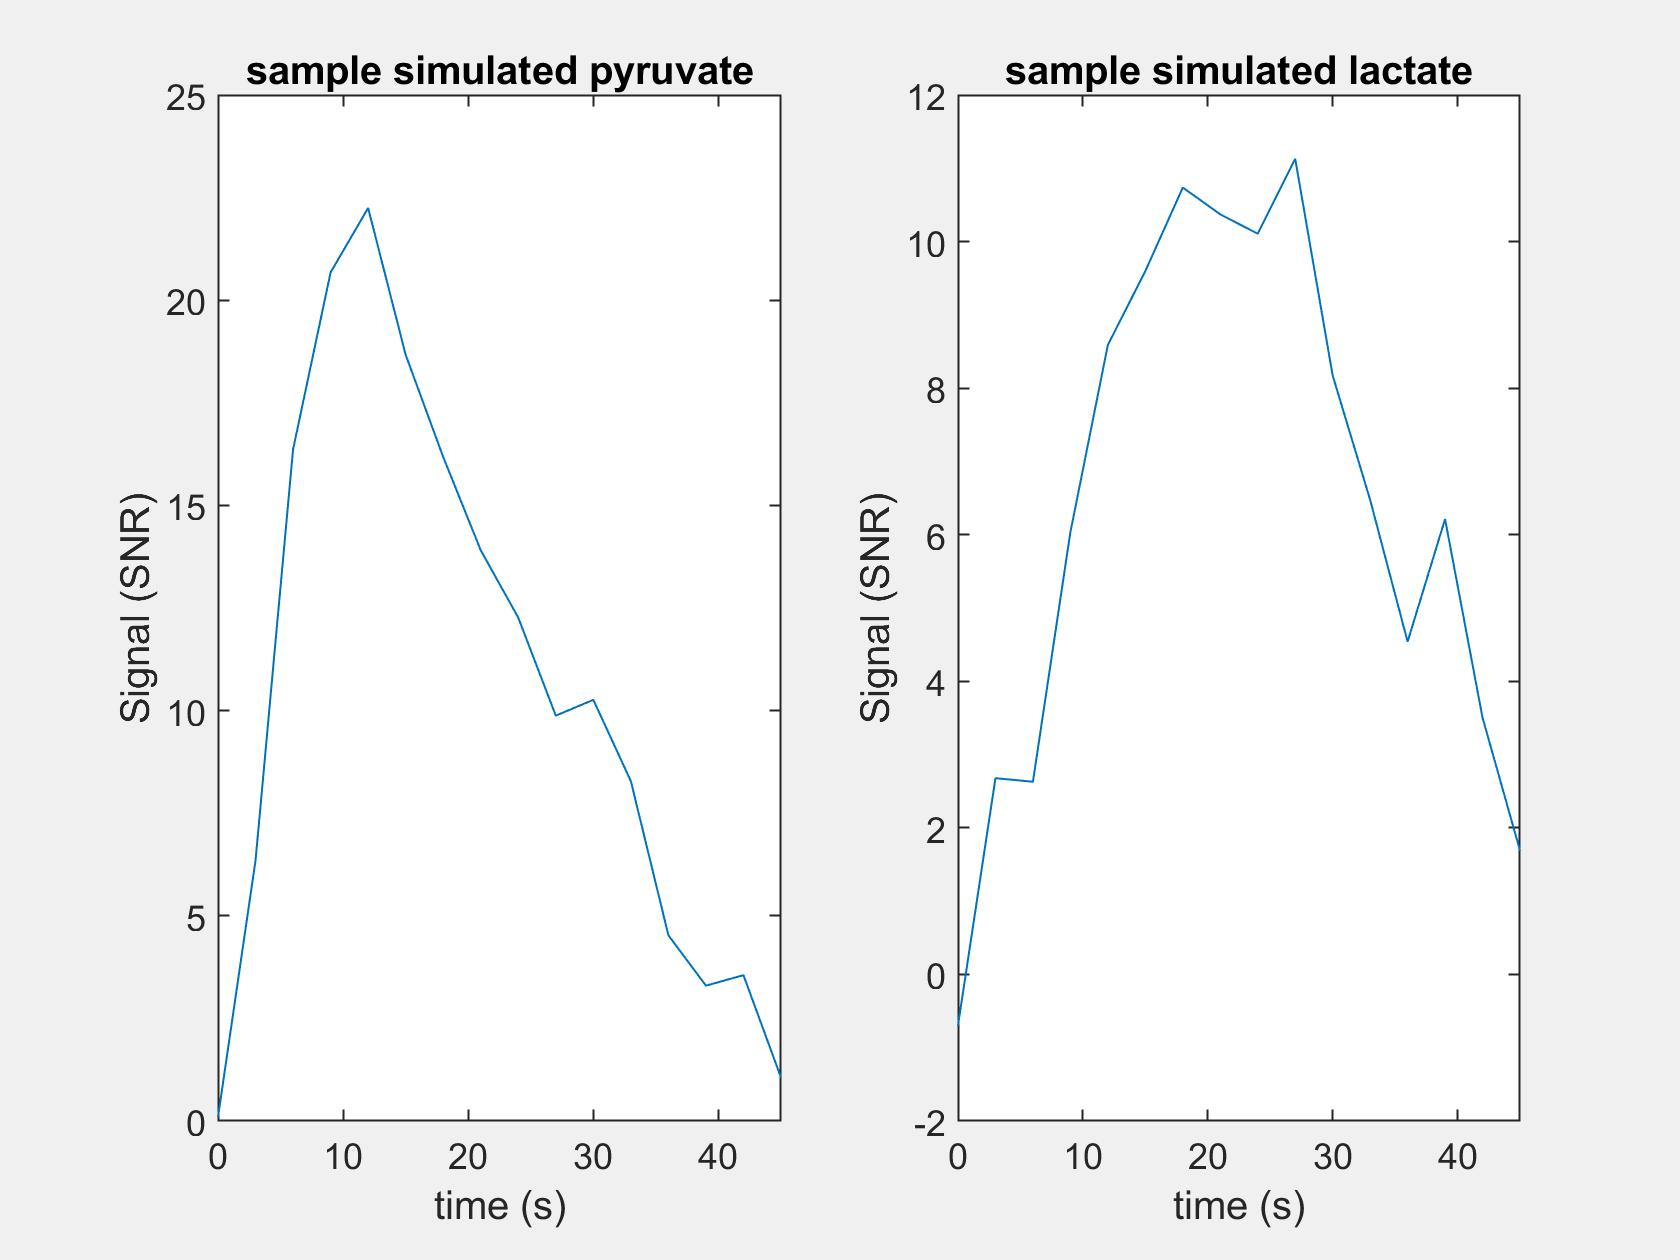

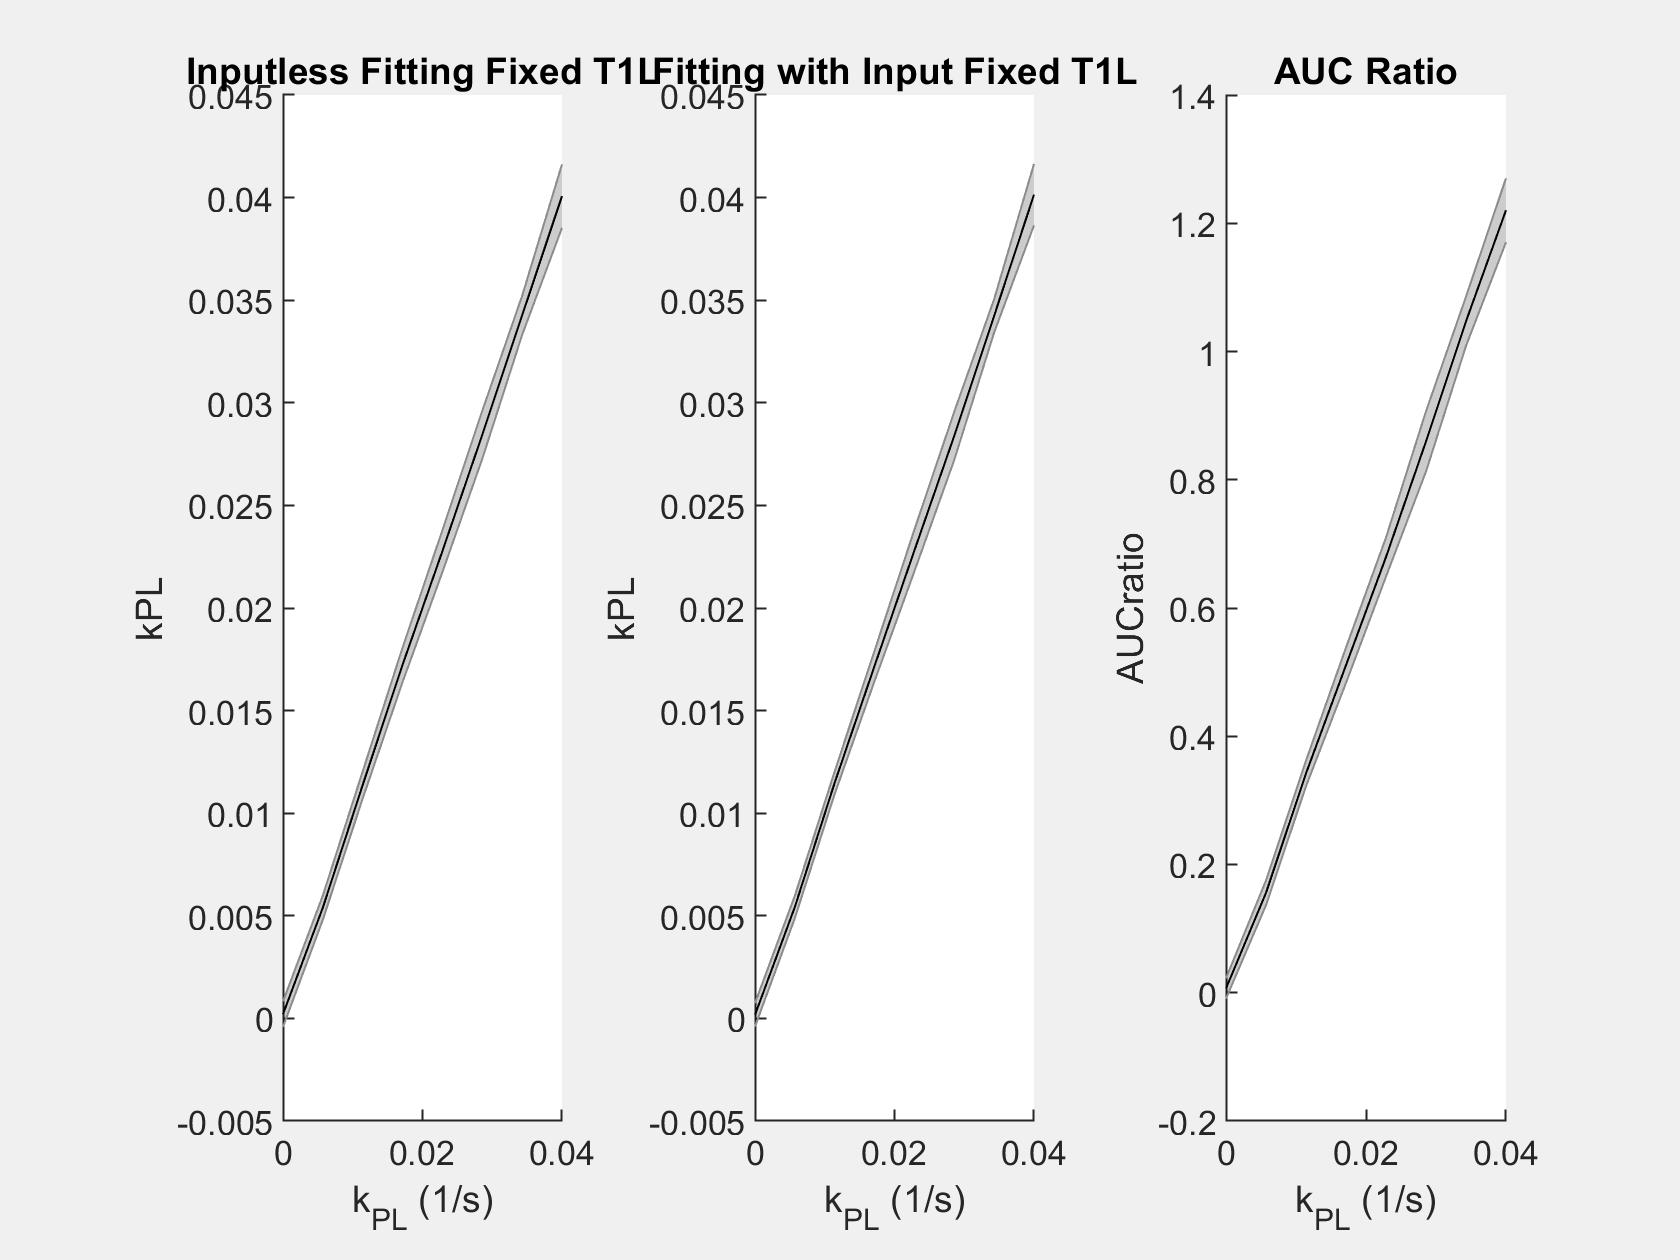

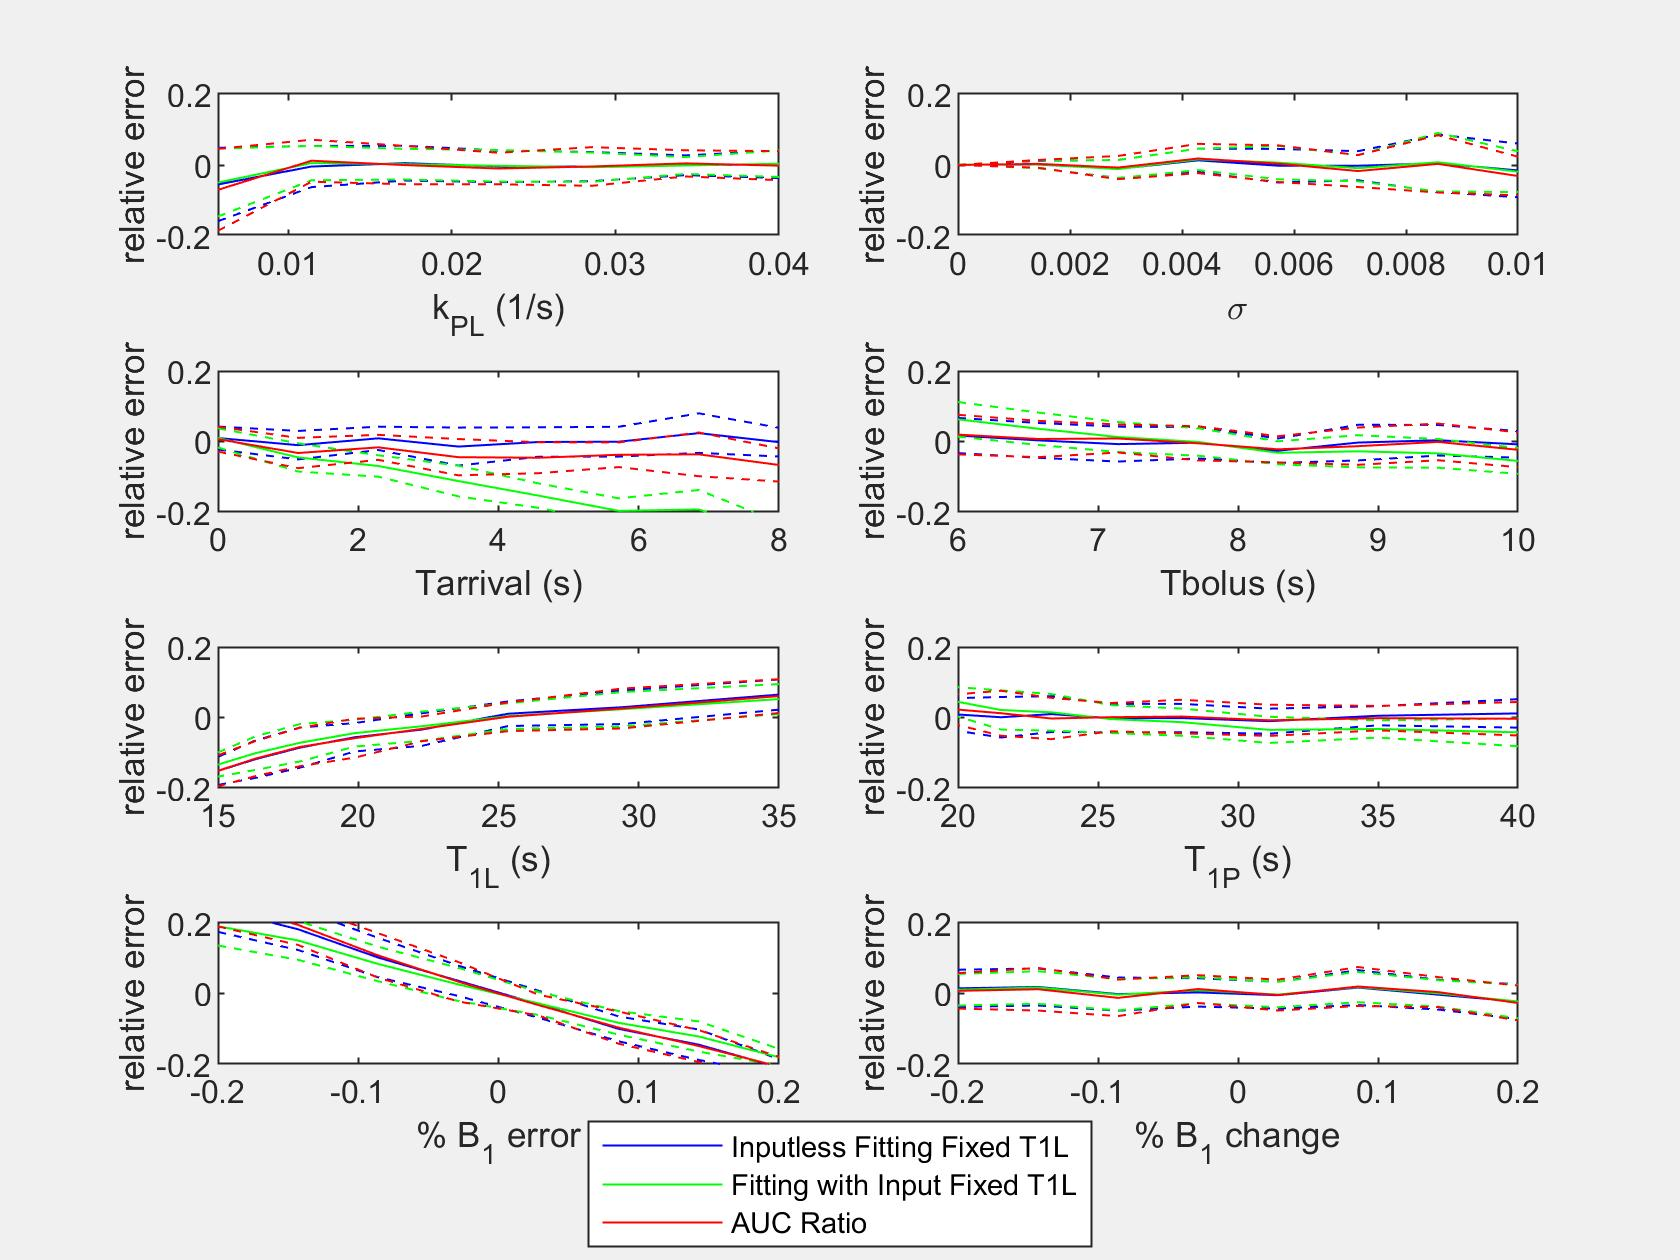

In [15]:
% 1. Now, compare inputless kPL fitting, kPL fitting with input and the AUC ratio all together
% See the 3rd section of test_HP_montecarlo_evaluation.m for an example
clear acq fitting;

% define acquisition parameters and flip angles
acq.TR = 3;
acq.N = 16;
acq.flips = repmat([10*pi/180; 40*pi/180], [1 acq.N]);

% define fitting parameters

% inputless kPL fitting
params_fixed.R1P = R1P_est; params_fixed.R1L = R1L_est;
params_est.kPL = kPL_est;
fitting(1).fit_fcn = @fit_pyr_kinetics;
fitting(1).params_fixed = params_fixed;
fitting(1).params_est = params_est;
fitting(1).fit_description = ['Inputless Fitting Fixed T1L'];
fitting(1).metric = 'kPL';

% kPL fitting with input
params_fixed.Tarrival = Tarrival_est; params_fixed.Tbolus = Tbolus_est;
fitting(2).fit_fcn = @fit_pyr_kinetics_and_input;
fitting(2).params_fixed = params_fixed;
fitting(2).params_est = params_est;
fitting(2).fit_description = ['Fitting with Input Fixed T1L'];
fitting(2).metric = 'kPL';

%AUC ratio
fitting(3).fit_fcn = @compute_AUCratio;
fitting(3).metric = 'AUCratio';  
fitting(3).fit_description = ['AUC Ratio'];

% run the function
[results, hdata, hsim] = HP_montecarlo_evaluation(acq, fitting, experiment);


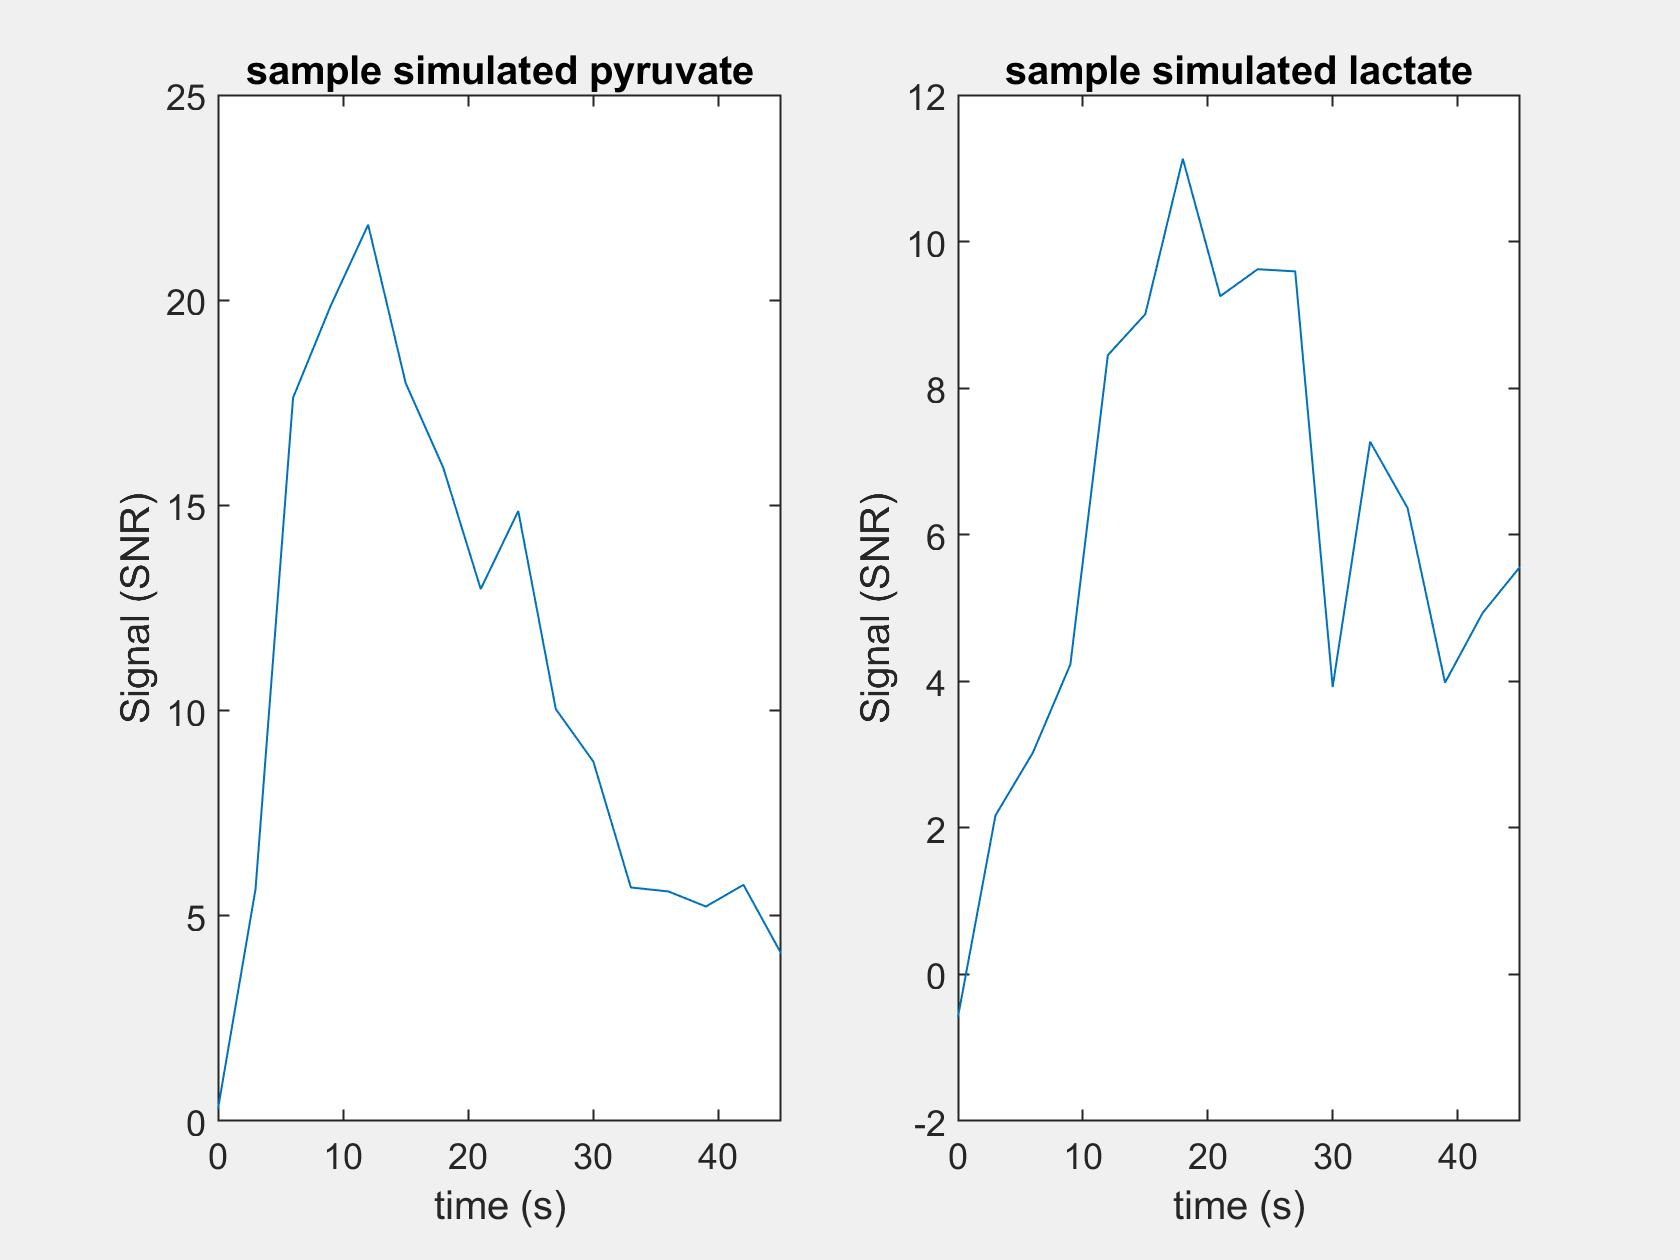

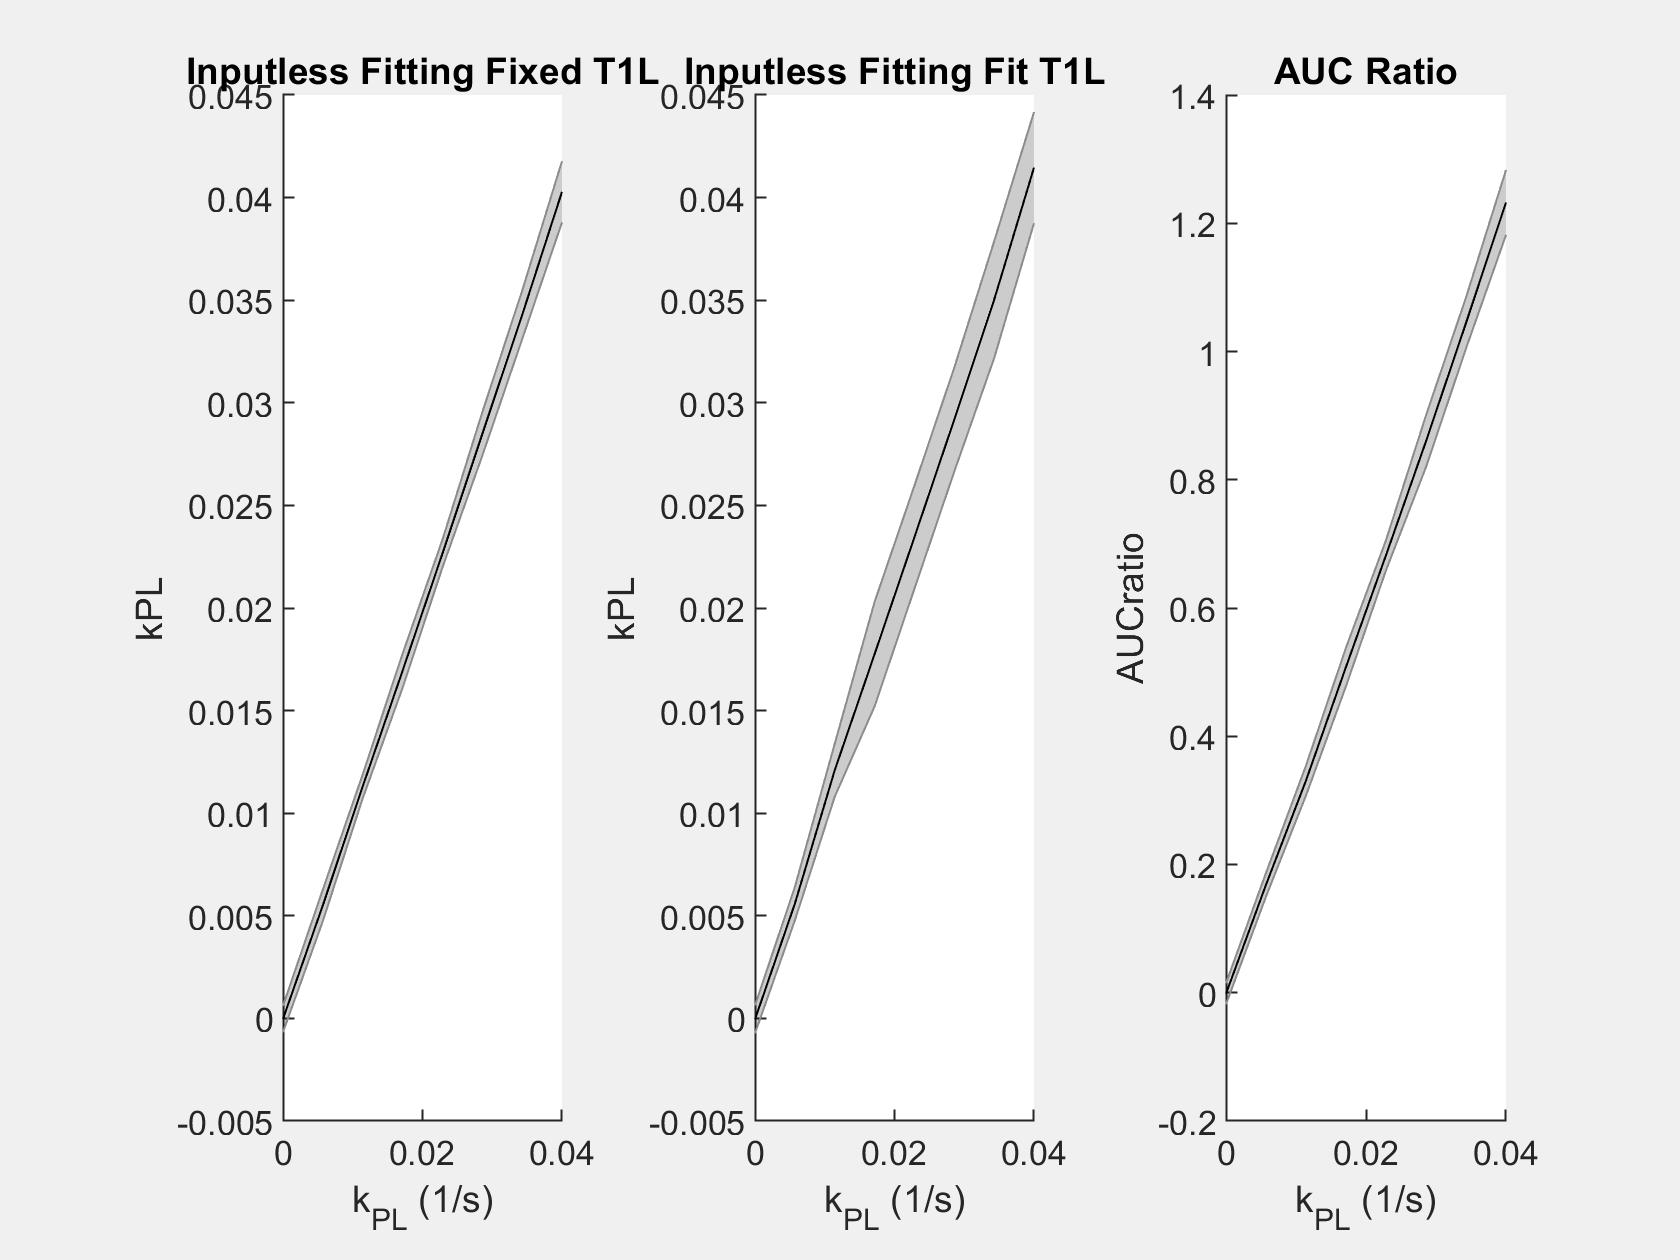

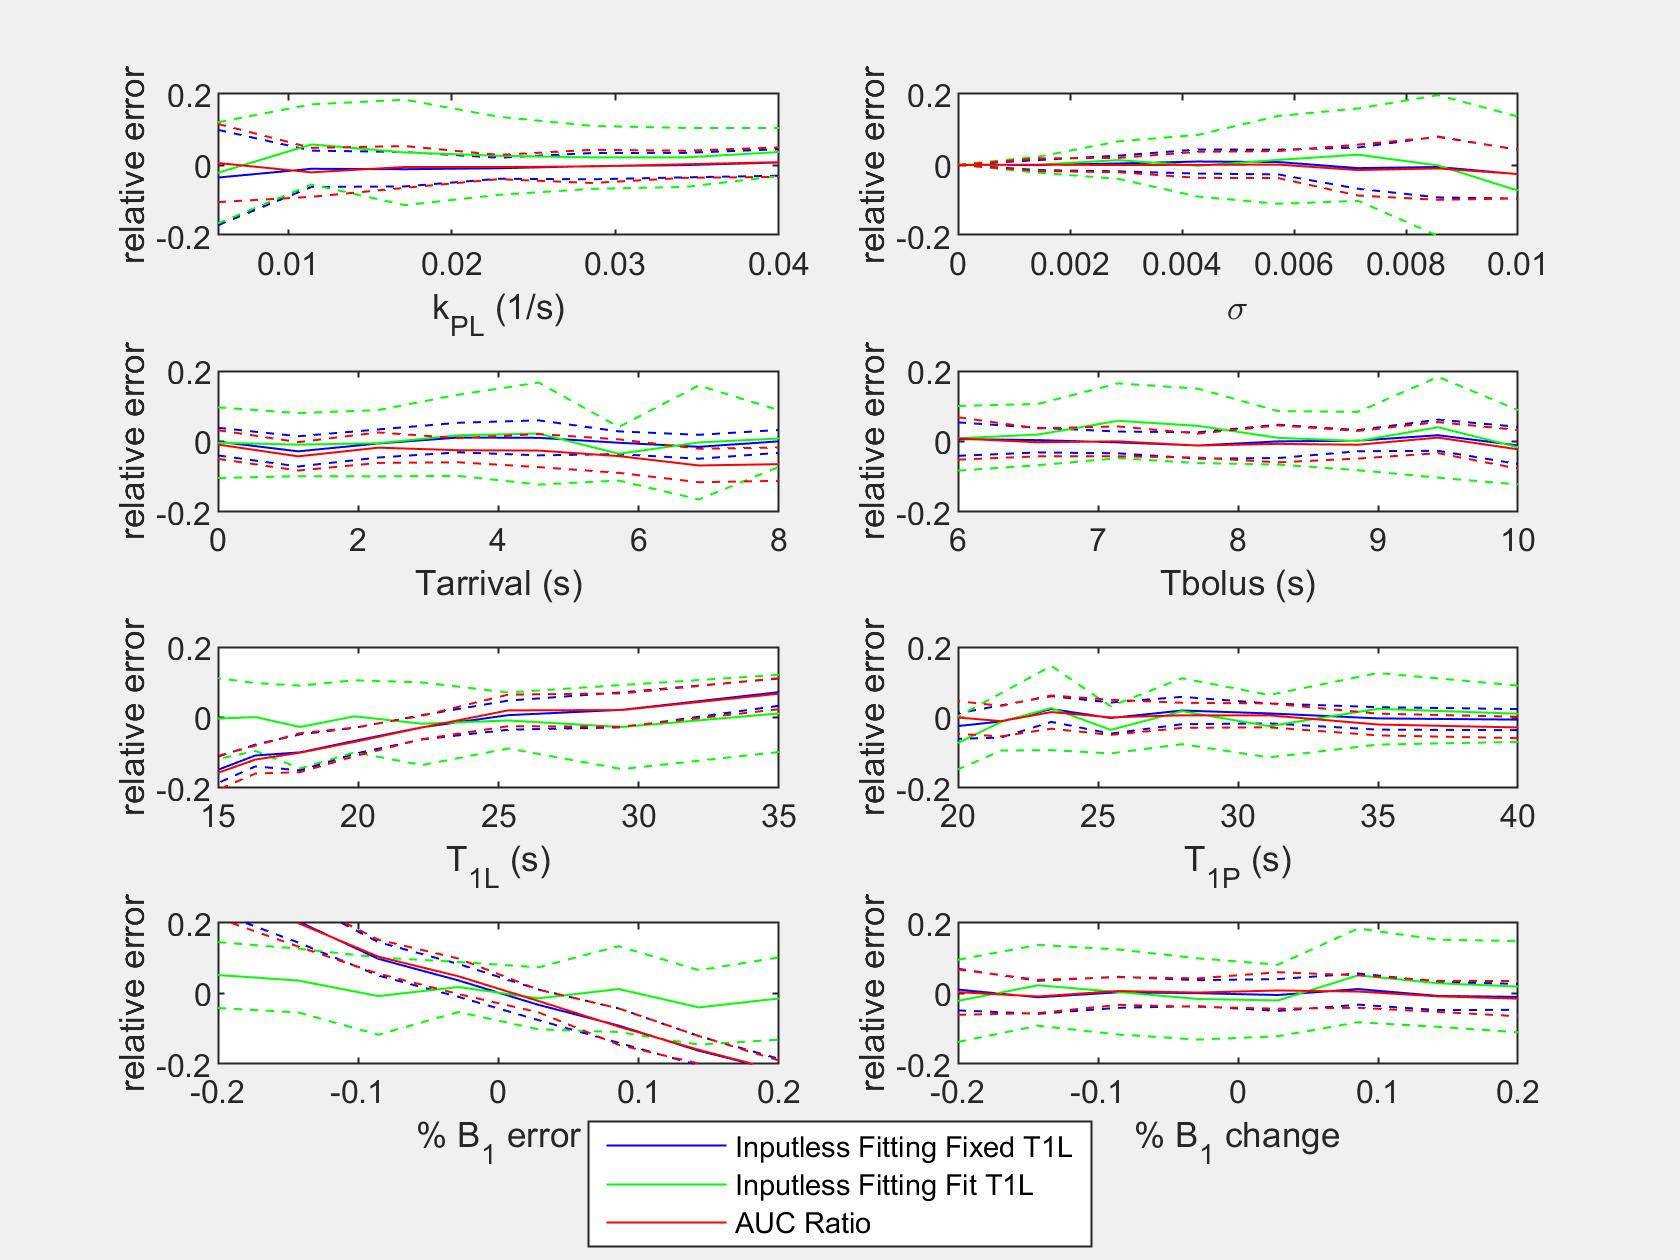

In [16]:
% 2. Compare the accuracy between the inputless kpl fitting with fixed
% lactate T1, inputless kPL fitting with fit lactate T1 and AUC ratio.
clear fitting params_fixed params_est;

% inputless kPL fitting with fixed lactate T1
params_fixed.R1P = R1P_est; params_fixed.R1L = R1L_est;
params_est.kPL = kPL_est;
fitting(1).fit_fcn = @fit_pyr_kinetics;
fitting(1).params_fixed = params_fixed;
fitting(1).params_est = params_est;
fitting(1).fit_description = ['Inputless Fitting Fixed T1L'];
fitting(1).metric = 'kPL';

% kPL fitting with input while fitting lactate T1
params_fixed_2.R1P = R1P_est; 
params_est_2.R1L = R1L_est;
params_est_2.kPL = kPL_est;
fitting(2).fit_fcn = @fit_pyr_kinetics;
fitting(2).params_fixed = params_fixed_2;
fitting(2).params_est = params_est_2;
fitting(2).fit_description = ['Inputless Fitting Fit T1L'];
fitting(2).metric = 'kPL';

%AUC ratio
fitting(3).fit_fcn = @compute_AUCratio;
fitting(3).metric = 'AUCratio';  
fitting(3).fit_description = ['AUC Ratio'];

% run the function
[results, hdata, hsim] = HP_montecarlo_evaluation(acq, fitting, experiment);

## Exercise: Explore the Effect of Lactate T1 on kPL Fit Accuracy

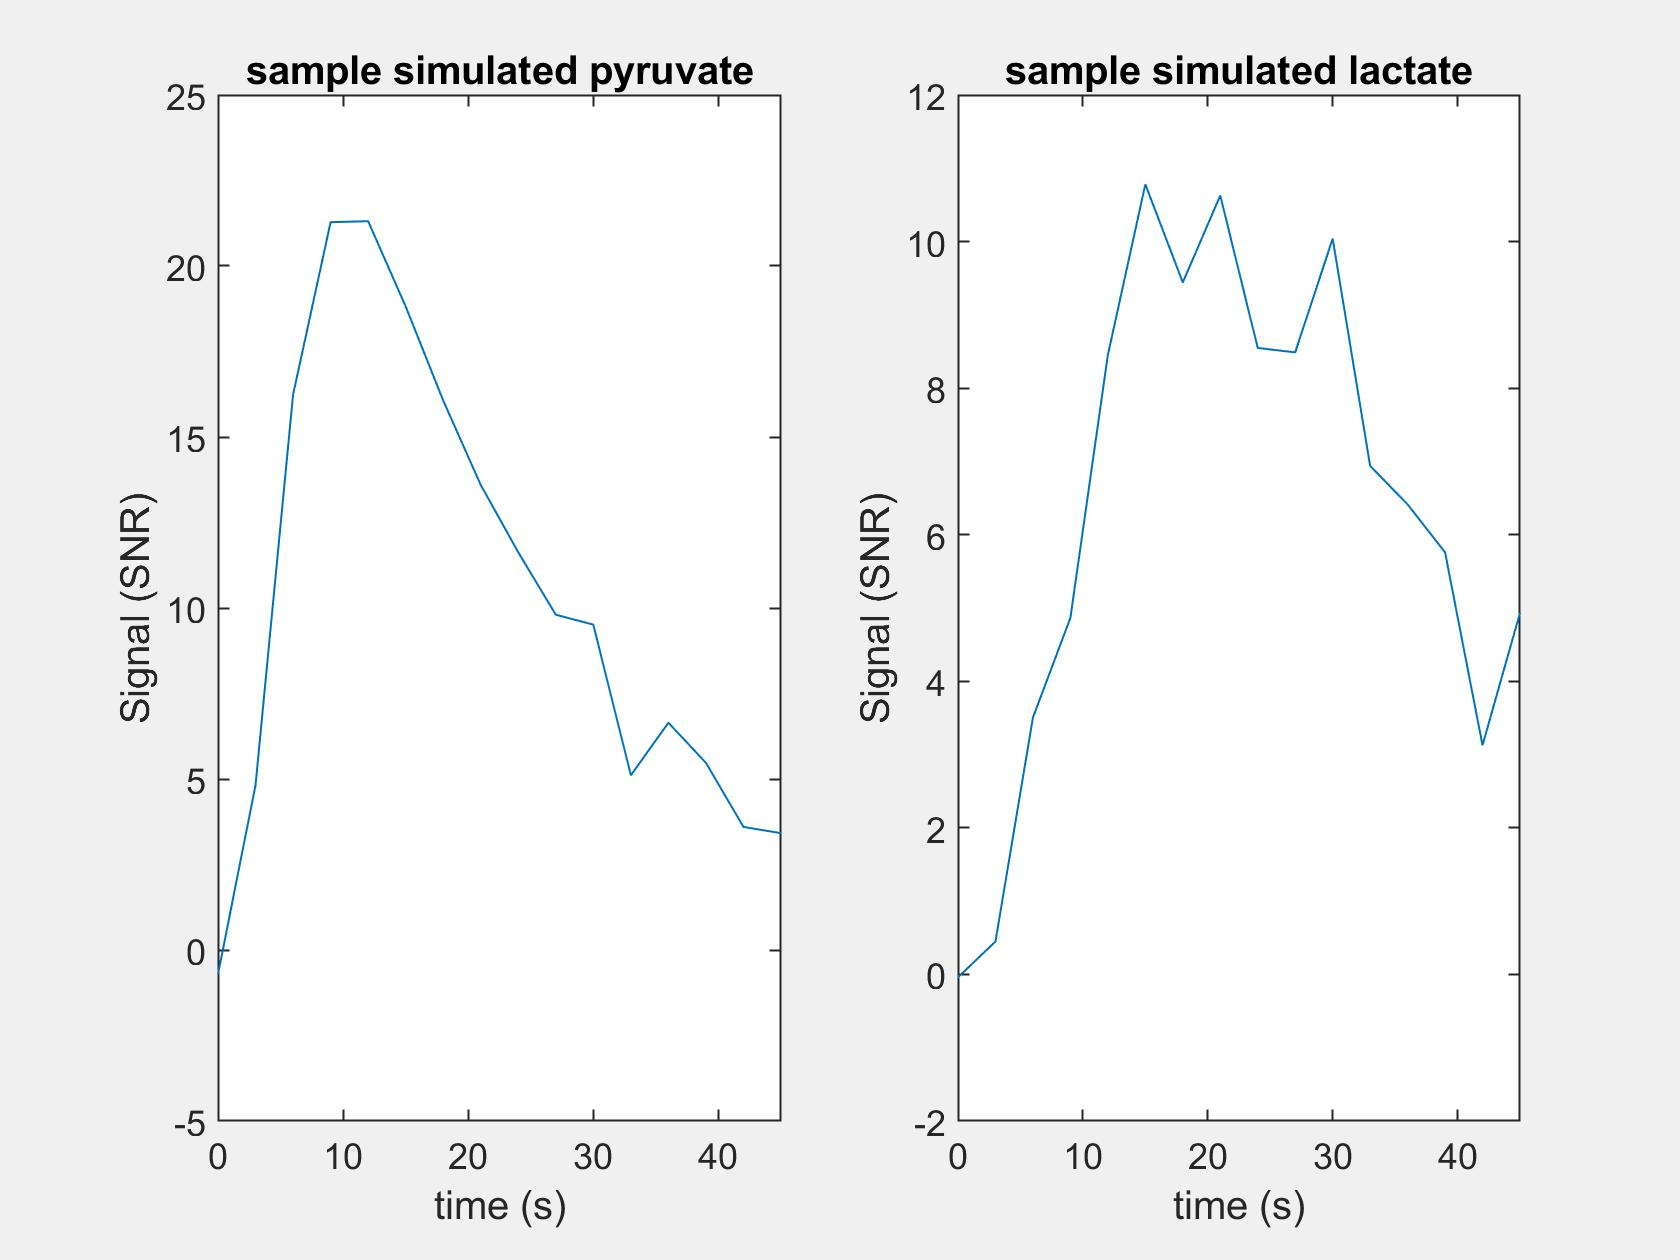

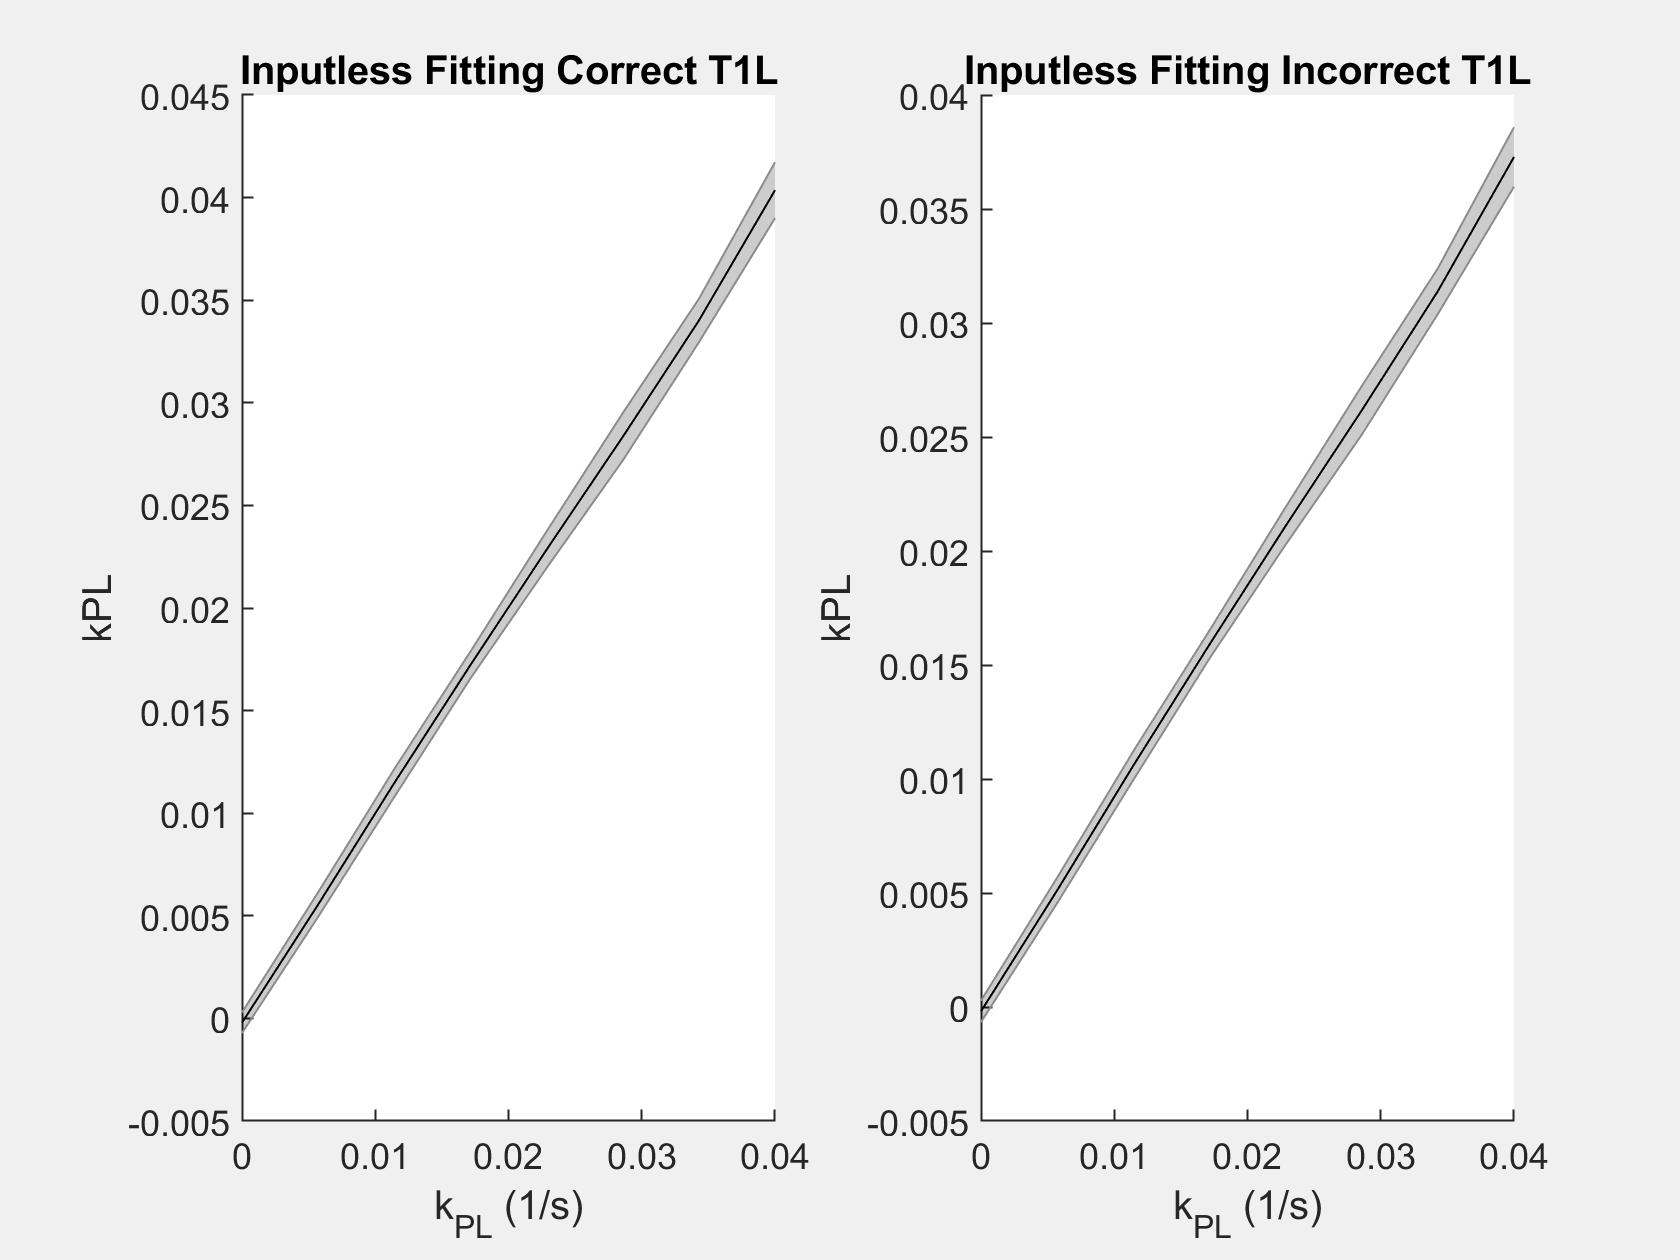

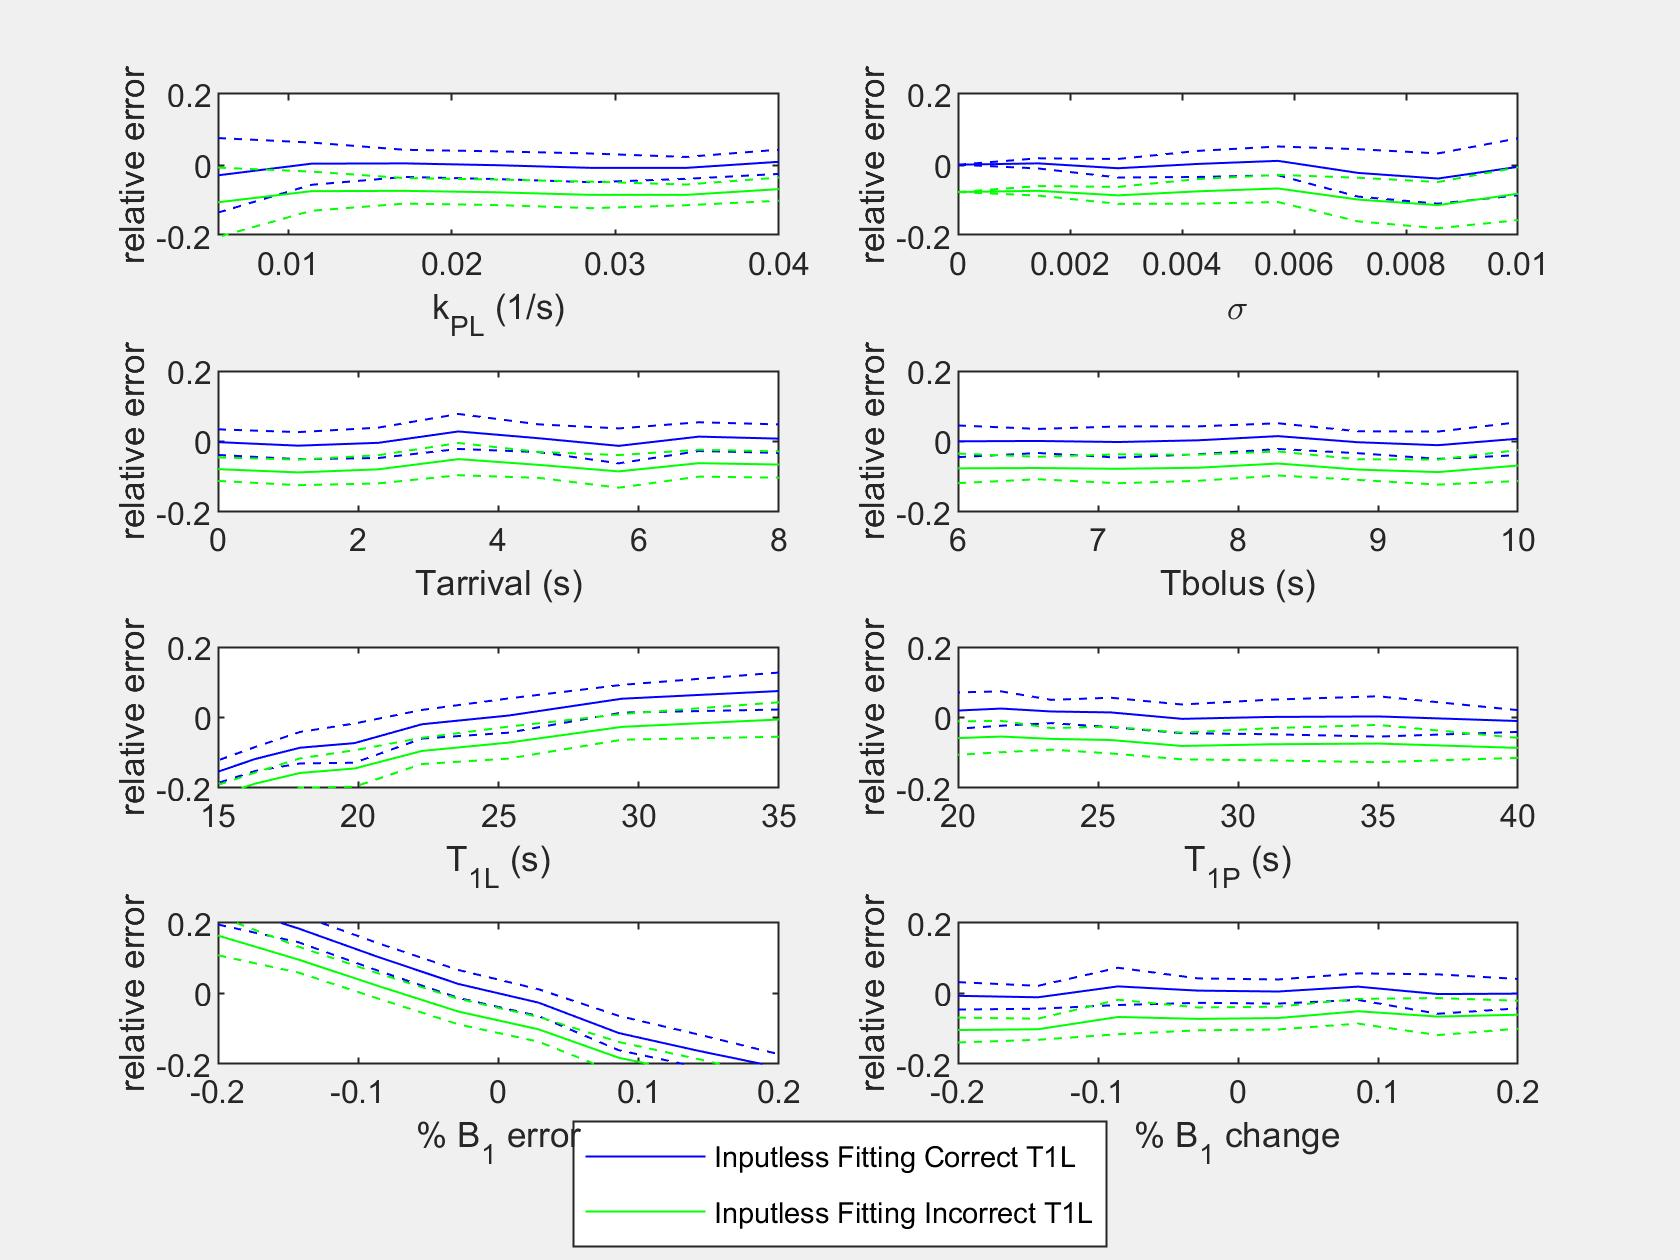

In [17]:
% 1. Compare inputless fitting with an incorrect estimated lactate T1 to
% inputless fitting with correct estimated lactate T1. How does estimating
% lactate T1 incorrectly affect kPL accuracy?

clear fitting params_fixed params_est params_fixed_2 params_est_2;

% inputless kPL fitting with fixed lactate T1
params_fixed.R1P = R1P_est; params_fixed.R1L = R1L_est;
params_est.kPL = kPL_est;
fitting(1).fit_fcn = @fit_pyr_kinetics;
fitting(1).params_fixed = params_fixed;
fitting(1).params_est = params_est;
fitting(1).fit_description = ['Inputless Fitting Correct T1L'];
fitting(1).metric = 'kPL';

% kPL fitting with input while fitting lactate T1
params_fixed_2.R1P = R1P_est; 
params_fixed_2.R1L = 1/35;
params_est_2.kPL = kPL_est;
fitting(2).fit_fcn = @fit_pyr_kinetics;
fitting(2).params_fixed = params_fixed_2;
fitting(2).params_est = params_est_2;
fitting(2).fit_description = ['Inputless Fitting Incorrect T1L'];
fitting(2).metric = 'kPL';

% run the function
[results, hdata, hsim] = HP_montecarlo_evaluation(acq, fitting, experiment);

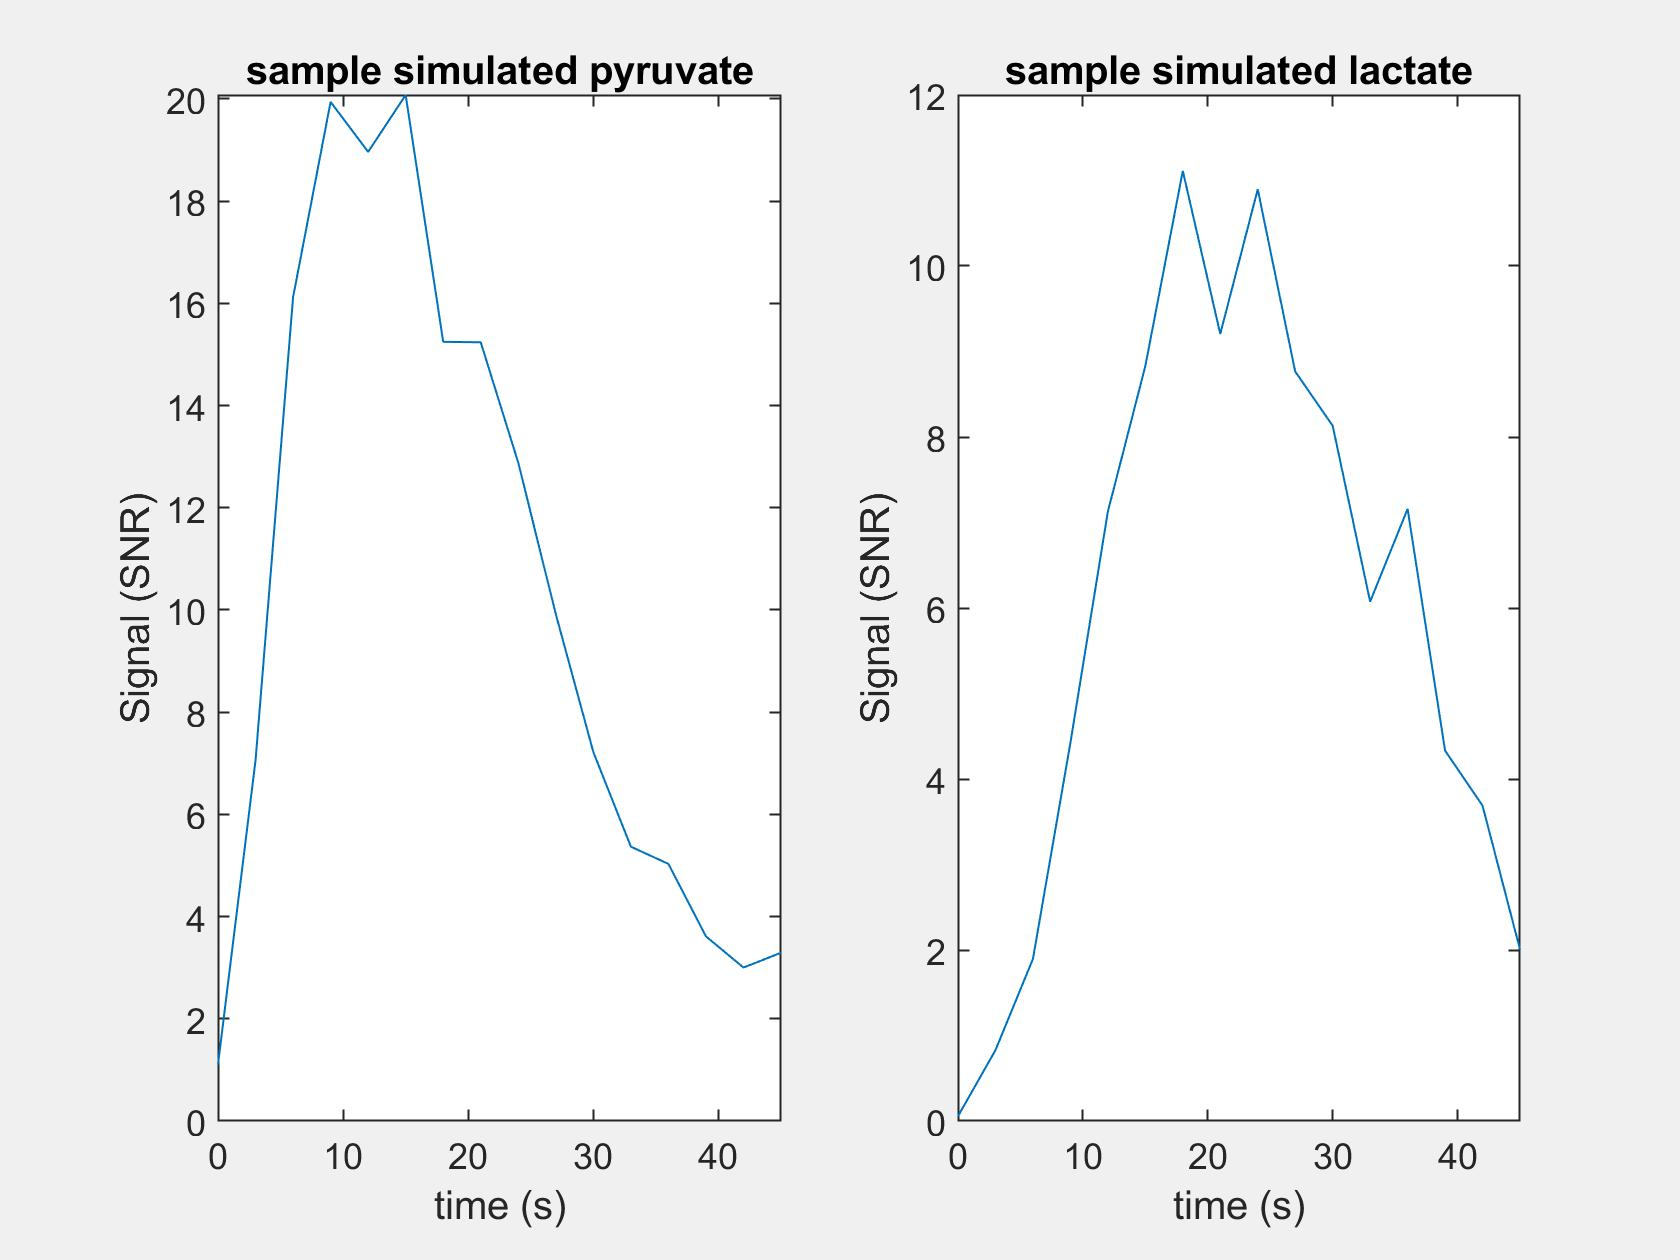

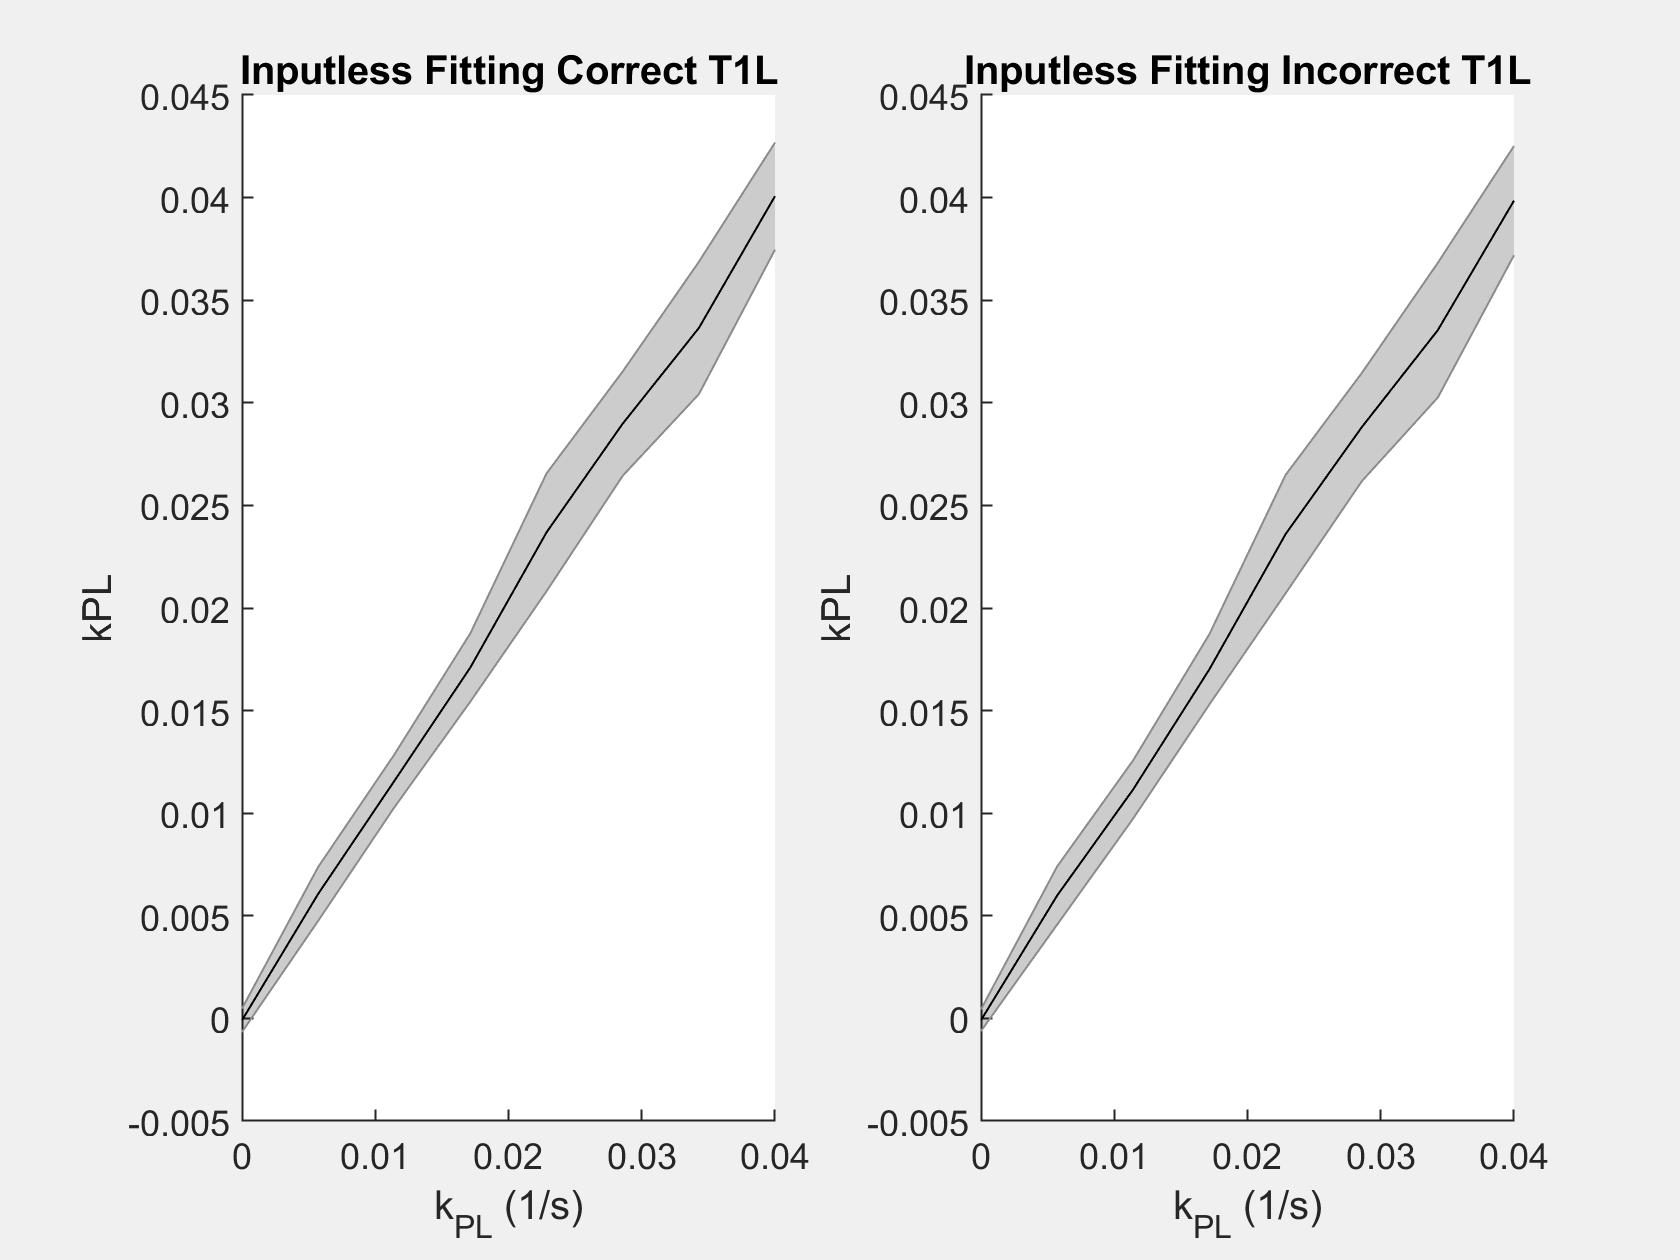

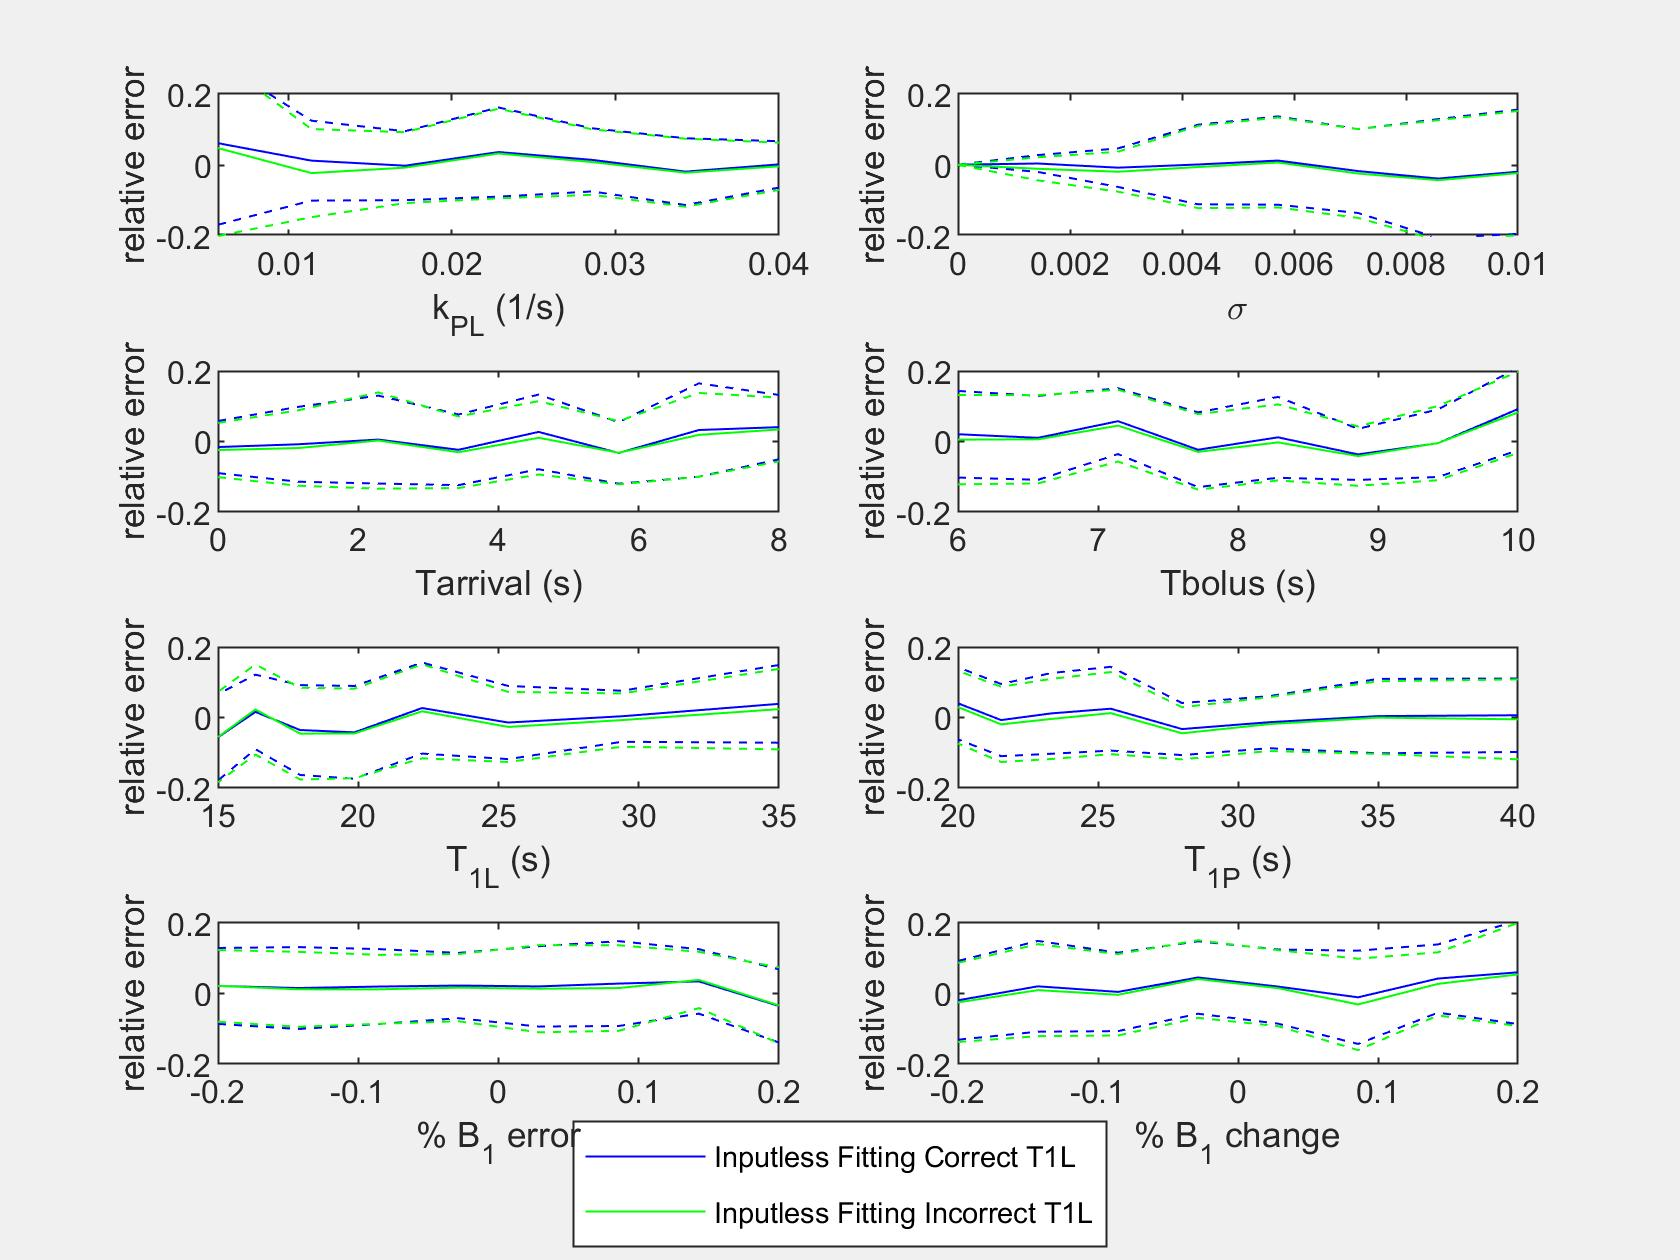

In [18]:
% 2. Try the above experiment again but while fitting T1. 

clear fitting params_fixed params_est params_fixed_2 params_est_2;

% inputless kPL fitting with fixed lactate T1
params_fixed.R1P = R1P_est; params_est.R1L = R1L_est;
params_est.kPL = kPL_est;
fitting(1).fit_fcn = @fit_pyr_kinetics;
fitting(1).params_fixed = params_fixed;
fitting(1).params_est = params_est;
fitting(1).fit_description = ['Inputless Fitting Correct T1L'];
fitting(1).metric = 'kPL';

% kPL fitting with input while fitting lactate T1
params_fixed_2.R1P = R1P_est; 
params_est_2.R1L = 1/35;
params_est_2.kPL = kPL_est;
fitting(2).fit_fcn = @fit_pyr_kinetics;
fitting(2).params_fixed = params_fixed_2;
fitting(2).params_est = params_est_2;
fitting(2).fit_description = ['Inputless Fitting Incorrect T1L'];
fitting(2).metric = 'kPL';

% run the function
[results, hdata, hsim] = HP_montecarlo_evaluation(acq, fitting, experiment);